In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from filterpy.kalman import ExtendedKalmanFilter
from filterpy.common import Q_discrete_white_noise
import random

In [2]:
def bbusppg(num):     # Returns B-bus..

    linedata = linedatas(num);
    fb = linedata[:,0];  #first column 
    tb = linedata[:,1];  #2nd column 
    b = linedata[:,4];   #5th column
    nbus = int(np.max([np.max(fb),np.max(tb)]))    # no. of buses...
    nbranch = len(fb);           # no. of branches...
    bbus = np.mat(np.zeros((nbus,nbus)));

    for k in range (0,nbranch):
        bbus[int(fb[k]-1),int(tb[k]-1)] = b[k]
        bbus[int(tb[k]-1),int(fb[k]-1)] = bbus[int(fb[k]-1),int(tb[k]-1)];

    return bbus
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

In [3]:
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

def zdatas(i):

        #      |Msnt |Type | Value | From | To | Rii | 
        #---- Voltage Magnitude ------------#
        
        
    Pow_i= Pi[i];  

    zdata14   =  np.mat([[1 , 1  ,  Pow_i[0] , 1 ,   0 ,  9e-4],
             #-----------------------------------#
             #---- Real Power Injection ---------#
             [2 , 2  ,  Pow_i[1] ,  2 ,   0 ,  1e-4],
             [3 , 2 ,  Pow_i[2] ,  3 ,   0 ,  1e-4], 
             [4 , 2 ,  Pow_i[3] , 7 ,   0  , 1e-4],
             [5 , 2 ,  Pow_i[4]   , 8 ,   0  , 1e-4], 
             [6 , 2 ,  Pow_i[5] , 10 ,   0 ,  1e-4],
             [7 , 2 ,  Pow_i[6] , 11 ,   0 ,  1e-4],
             [8 , 2 ,  Pow_i[7], 12 ,   0 ,  1e-4], 
             [9 , 2 ,  Pow_i[8] , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #---- Reative Power Injection -------#
             [10 , 3 ,   Pow_i[9] ,  2 ,   0 ,  1e-4],
             [11 , 3 ,   Pow_i[10] ,  3 ,   0 ,  1e-4], 
             [12 , 3 ,   Pow_i[11] , 7 ,   0  , 1e-4],
             [13 , 3 ,   Pow_i[12],  8 ,   0 ,  1e-4], 
             [14 , 3 ,  Pow_i[13] , 10 ,   0 ,  1e-4],
             [15 , 3 ,  Pow_i[14], 11 ,   0 ,  1e-4],
             [16 , 3 ,  Pow_i[15], 12 ,   0 ,  1e-4], 
             [17 , 3 ,  Pow_i[16], 14 ,   0 ,  1e-4],
             #------------------------------------#
             #------ Real Power Flow ------------- #
             [18 , 4 ,   Pow_i[17] ,  1 ,   2 ,  64e-6],
             [19 , 4 ,   Pow_i[18],  2 ,   3 ,  64e-6],
             [20 , 4 ,  Pow_i[19] ,  4 ,   2 ,  64e-6],
             [21 , 4 ,   Pow_i[20] ,  4 ,   7 ,  64e-6],
             [22 , 4 ,   Pow_i[21] ,  4 ,   9 ,  64e-6],
             [23 , 4 ,  Pow_i[22] ,  5 ,   2 ,  64e-6],
             [24 , 4 ,   Pow_i[23],  5 ,   4 ,  64e-6],
             [25 , 4 ,   Pow_i[24],  5 ,   6 ,  64e-6],
             [26 , 4 ,   Pow_i[25] ,  6 ,  13 ,  64e-6],
             [27 , 4 ,   Pow_i[26] ,  7 ,   9 ,  64e-6],
             [28 , 4 ,  Pow_i[27] , 11 ,   6 ,  64e-6],
             [29 , 4 ,  Pow_i[28] , 12 ,  13 ,  64e-6],
             #------------------------------------#
             #------ Reactive Power Flow -------- #
             [30 , 5 ,  Pow_i[29] ,  1 ,   2 ,  64e-6],
             [31 , 5 ,  Pow_i[30] ,  2 ,   3 ,  64e-6],
             [32 , 5 ,  Pow_i[31] ,  4 ,   2 ,  64e-6],
             [33 , 5 ,  Pow_i[32] ,  4 ,   7 ,  64e-6],
             [34 , 5 ,  Pow_i[33] ,  4 ,  9 ,  64e-6],
             [35 , 5 ,  Pow_i[34] ,  5 ,   2 ,  64e-6],
             [36 , 5 ,  Pow_i[35] ,  5 ,   4 ,  64e-6],
             [37 , 5 ,  Pow_i[36] ,  5 ,   6 ,  64e-6],
             [38 , 5 ,  Pow_i[37] ,  6 ,  13 ,  64e-6],
             [39 , 5 ,  Pow_i[38] ,  7 ,   9 ,  64e-6],
             [40 , 5 ,  Pow_i[39] , 11 ,   6 ,  64e-6],
             [41 , 5 ,  Pow_i[40] , 12 ,  13 ,  64e-6]]);
             #--------------------------------------#


    # Just in case you want to add other systems, add the data above 
    # and change the following condition accordingly
    if num == 3:
        zdt =zdata3;
    elif num==14:
        zdt = zdata14;
    elif num==30:
        zdt = zdata30
        
             
    return zdt

In [4]:
# Line data function

def  linedatas(num):

    # ,    |  From |  To   |   R     |   X     |     B/2  |  X'mer  |
    # ,    |  Bus  | Bus   |  pu     |  pu     |     pu   | TAP (a) |
    linedat14 = np.mat([[1 ,   2 ,  0.01938  , 0.05917  ,  0.0264 ,    1],
                       [1 ,    5 ,  0.05403  , 0.22304  ,  0.0246 ,    1],
                       [2 ,    3 ,  0.04699  , 0.19797  ,  0.0219 ,    1],
                       [2 ,    4 ,  0.05811  , 0.17632  ,  0.0170 ,    1],
                       [2 ,    5 ,  0.05695  , 0.17388  ,  0.0173 ,    1],
                       [3 ,    4 ,  0.06701  , 0.17103  ,  0.0064 ,    1],
                       [4 ,    5 ,  0.01335  , 0.04211  ,  0.0    ,    1],
                       [4 ,    7 ,  0.0      , 0.20912  ,  0.0 ,   0.978],
                       [4 ,    9 ,  0.0      , 0.55618  ,  0.0 ,   0.969],
                       [5 ,    6 ,  0.0      , 0.25202  ,  0.0 ,   0.932],
                       [6 ,    11,  0.09498  , 0.19890  ,  0.0 ,       1],
                       [6 ,    12,  0.12291  , 0.25581  ,  0.0 ,       1],
                       [6 ,    13,  0.06615  , 0.13027  ,  0.0 ,       1],
                       [7 ,    8 ,  0.0      , 0.17615  ,  0.0 ,       1],
                       [7 ,    9 ,  0.0      , 0.11001  ,  0.0 ,       1],
                       [9 ,    10,  0.03181  , 0.08450  ,  0.0 ,       1],
                       [9 ,    14,  0.12711  , 0.27038  ,  0.0 ,       1],
                       [10 ,   11,  0.08205  , 0.19207  ,  0.0 ,       1],
                       [12 ,   13,  0.22092  , 0.19988  ,  0.0 ,       1],
                       [13 ,   14,  0.17093  , 0.34802  ,  0.0 ,       1]]);


    if num == 3:
        linedt = linedat3;
    elif num==14: 
        linedt = linedat14;
    elif num==30:
        linedt = linedat30;
        
             
    return linedt

In [5]:
# Returns ybus
def ybusppg(num):  

    linedata = linedatas(num); # Calling "linedata6.m" for Line Data...
    fb = linedata[:,0];     # From bus number... i.e in the column 1
    tb = linedata[:,1];     # To bus number...
    r = linedata[:,2];      # Resistance, R...
    x = linedata[:,3];      # Reactance, X...
    b = linedata[:,4];      # Ground Admittance, B/2...
    a = linedata[:,5];      # Tap setting value..
    z = r + x*1j;            # Z matrix...
    y = 1/z;               # To get inverse of each element...
    b = b*1j;                # Make B imaginary...

    nbus = int(np.max([np.max(fb),np.max(tb)]));    # no. of buses...(14 in this case)
    nbranch = len(fb) # no. of branches...(= 20)
    ybus = np.mat(np.zeros((nbus,nbus), dtype=complex));       # Initialise YBus...
    
    # Formation of the Off Diagonal Elements...
    for k in range (0,nbranch):
        ybus[int(fb[k]-1),int(tb[k]-1)] =ybus[int(fb[k]-1),int(tb[k]-1)]- (y[k]/a[k]);
        ybus[int(tb[k]-1),int(fb[k]-1)] = ybus[int(fb[k]-1),int(tb[k]-1)];
 
 
    # Formation of Diagonal Elements....
    for m in range (0,nbus):
        for n in range (0,nbranch):
            if fb[n]-1 == m:
                ybus[m,m]=ybus[m,m]+ (y[n]/(a[n]**2)) + b[n]
            elif tb[n]-1 ==m:
                ybus[m,m]=ybus[m,m]+y[n]
                

    return ybus

In [6]:

# here we get the 27*41 matrix
def HJacobian_at1(x):
    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
#     z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..
    H11=np.mat(np.zeros((nvi,nbus-1)))

    H12=np.mat(np.zeros((nvi,nbus)))
    for k in range(0,nvi):
        for n in range(0,nvi):
            if n == k:
                 H12[k,n]=1

    H21=np.mat(np.zeros((npi,nbus-1)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H21[i,k] += V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
                H21[i,k] -= (V[m]**2)*B[m,m]
            else:
                H21[i,k]=V[m]*V[k+1]*(G[m,k+1]*np.sin(del1[m]-del1[k+1]) - B[m,k+1]*np.cos(del1[m]-del1[k+1]))

    H22=np.mat(np.zeros((npi,nbus)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H22[i,k] += V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H22[i,k] += V[m]*G[m,m]
            else:
                H22[i,k]=V[m]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    H31=np.mat(np.zeros((nqi,nbus-1)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                     H31[i,k] += V[m]*V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H31[i,k] -= (V[m]**2)*G[m,m]
            else:
                H31[i,k]=V[m]*V[k+1]*(-G[m,k+1]*np.cos(del1[m]-del1[k+1]) - B[m,k+1]*np.sin(del1[m]-del1[k+1]))

    H32=np.mat(np.zeros((nqi,nbus)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                     H32[i,k] += V[n]*(G[m,n]*np.sin(del1[m]-del1[n]) - B[m,n]*np.cos(del1[m]-del1[n]))
                H32[i,k] -= V[m]*B[m,m]
            else:
                H32[i,k]=V[m]*(G[m,k]*np.sin(del1[m]-del1[k]) - B[m,k]*np.cos(del1[m]-del1[k]))

    H41=np.mat(np.zeros((npf,nbus-1)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H41[i,k] = V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            elif k+1 == n:
                H41[i,k] = -V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H41[i,k] = 0

    H42=np.mat(np.zeros((npf,nbus)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H42[i,k] = -V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n])) -2*G[m,n]*V[m]
            elif k == n:
                H42[i,k] = -V[m]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H42[i,k] = 0

    H51=np.mat(np.zeros((nqf,nbus-1)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                 H51[i,k] = -V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            elif k+1 == n:
                H51[i,k] = V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H51[i,k] = 0

    H52=np.mat(np.zeros((nqf,nbus)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H52[i,k] = -V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n])) -2*V[m]*(-B[m,n]+bpq[m,n])
            elif k == n:
                H52[i,k] = -V[m]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H52[i,k] = 0

    H1=np.mat(np.concatenate((H11,H12),axis=1))
    H2=np.mat(np.concatenate((H21,H22),axis=1))
    H3=np.mat(np.concatenate((H31,H32),axis=1))
    H4=np.mat(np.concatenate((H41,H42),axis=1))
    H5=np.mat(np.concatenate((H51,H52),axis=1))

    H=np.mat(np.concatenate((H1,H2,H3,H4,H5)))
    return H
    

In [7]:
def Hx(x):

    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
    z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..

    h1 = np.mat(V[int(fbus[vi])-1,0]);
    h2 = np.mat(np.zeros((npi,1)));
    h3 = np.mat(np.zeros((nqi,1)));
    h4 = np.mat(np.zeros((npf,1)));
    h5 = np.mat(np.zeros(((nqf,1))));
    

    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            h2[i] += V[m]*V[k]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            h3[i] += V[m]*V[k]*((G[m,k]*np.sin(del1[m]-del1[k])) - (B[m,k]*np.cos(del1[m]-del1[k])))

    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        h4[i] = -(V[m]**2)*G[m,n] - V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))

    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        h5[i] = -(V[m]**2)*(-B[m,n]+bpq[m,n]) - V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))

    h=np.mat(np.concatenate((h1,h2,h3,h4,h5)))
    
    return h

0


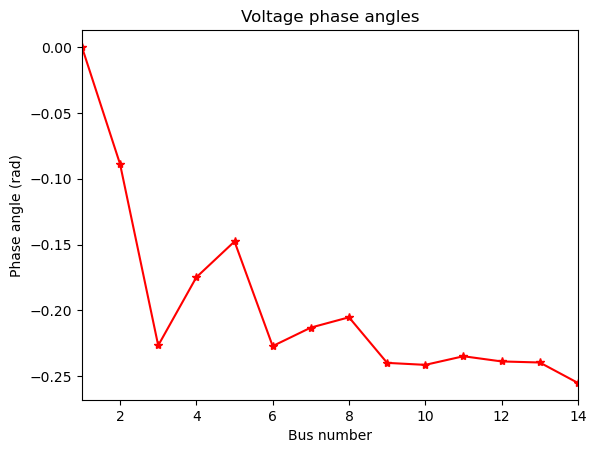

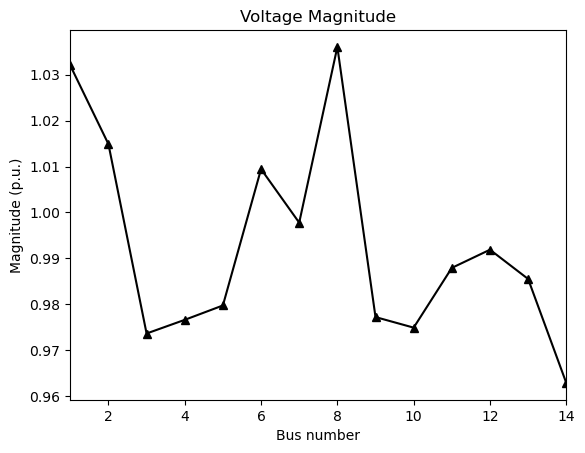

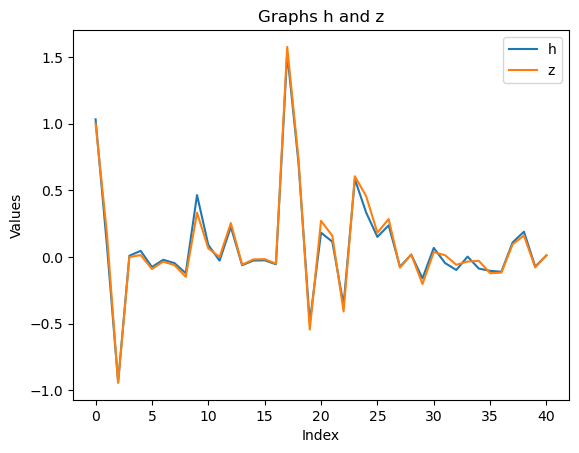

State:

 [[1.03198455]
 [1.01488028]
 [0.97367141]
 [0.97664517]
 [0.97977118]
 [1.00944402]
 [0.99778781]
 [1.03602344]
 [0.97724624]
 [0.97494757]
 [0.98794737]
 [0.99190375]
 [0.98553448]
 [0.96291968]]
1


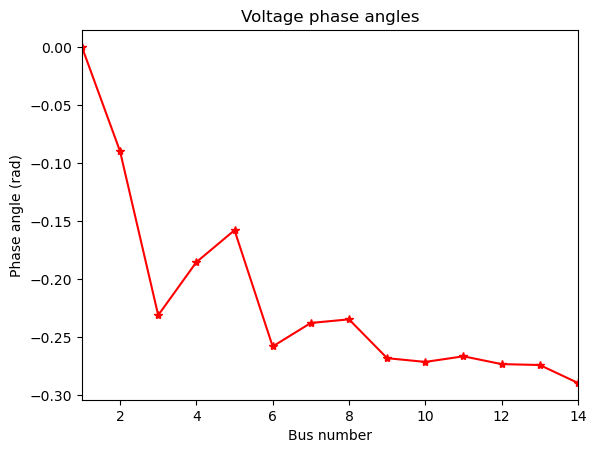

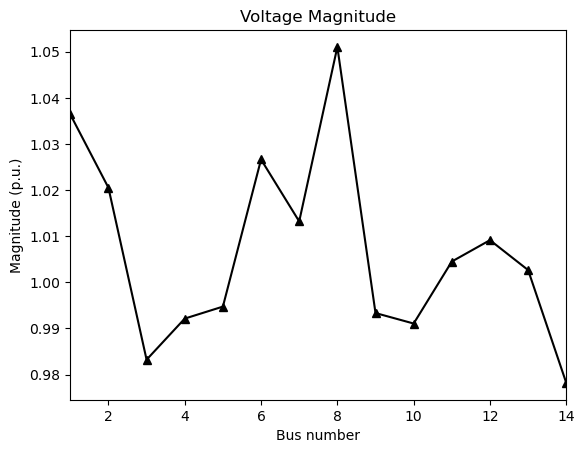

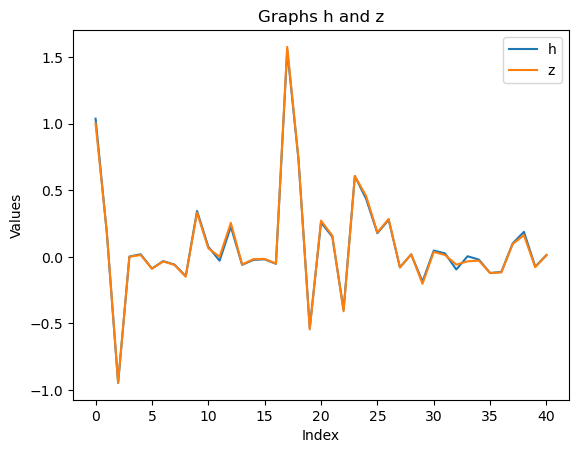

State:

 [[1.03641131]
 [1.02051217]
 [0.98321422]
 [0.99212765]
 [0.99472627]
 [1.02663142]
 [1.01320414]
 [1.05104221]
 [0.9933293 ]
 [0.99105539]
 [1.00449956]
 [1.00913765]
 [1.00264963]
 [0.97817589]]
2


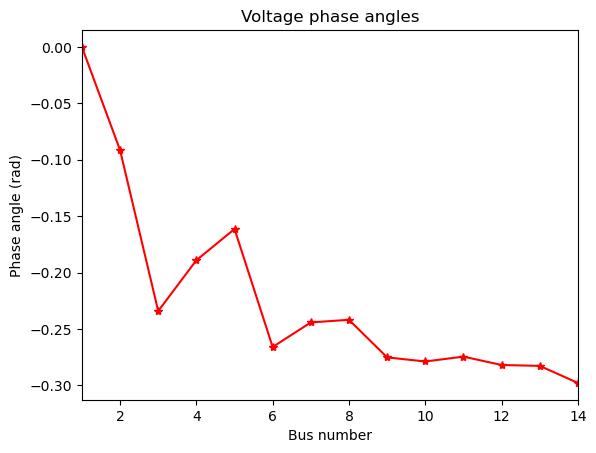

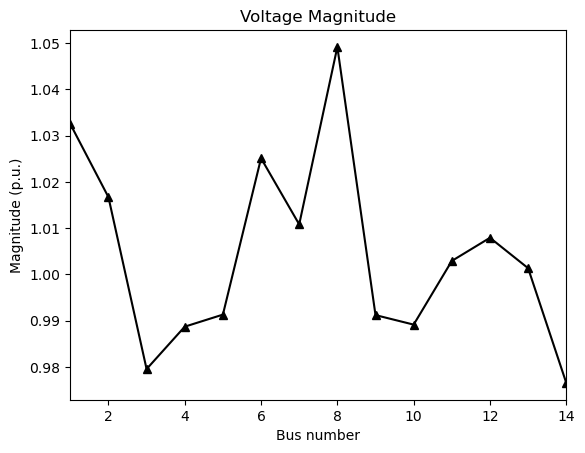

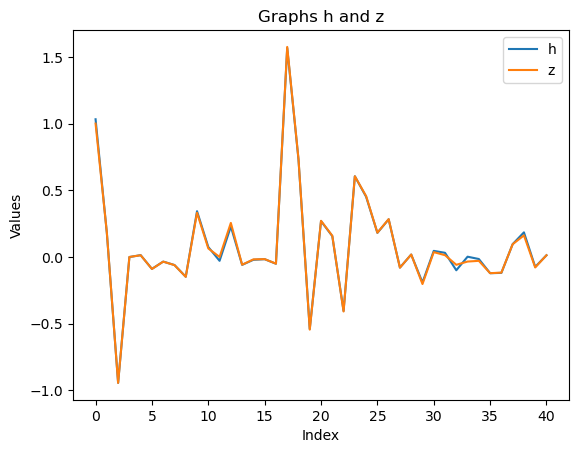

State:

 [[1.03252678]
 [1.01670266]
 [0.97951066]
 [0.98868325]
 [0.99128906]
 [1.02511082]
 [1.01080425]
 [1.04918843]
 [0.99118493]
 [0.98912712]
 [1.00290098]
 [1.00790864]
 [1.00132808]
 [0.97651607]]
3


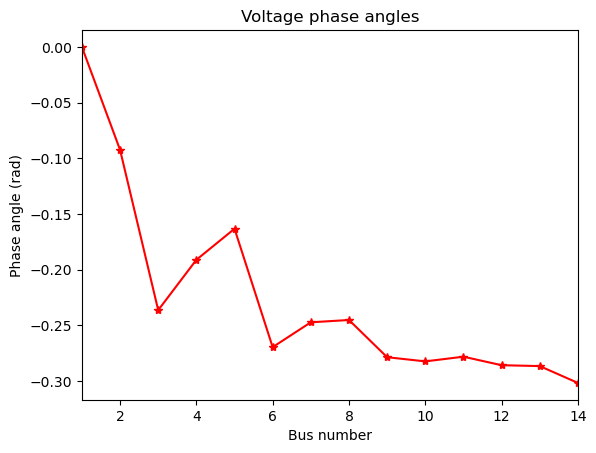

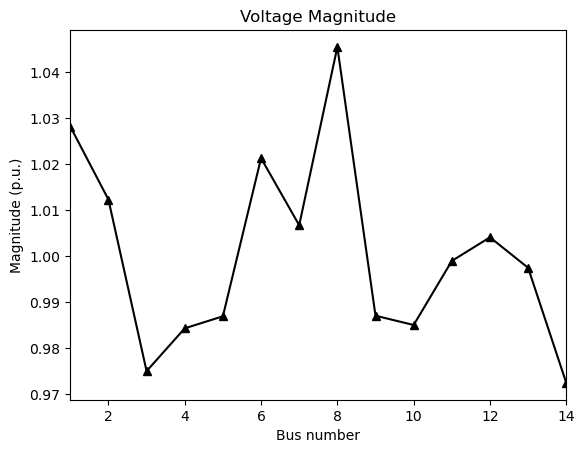

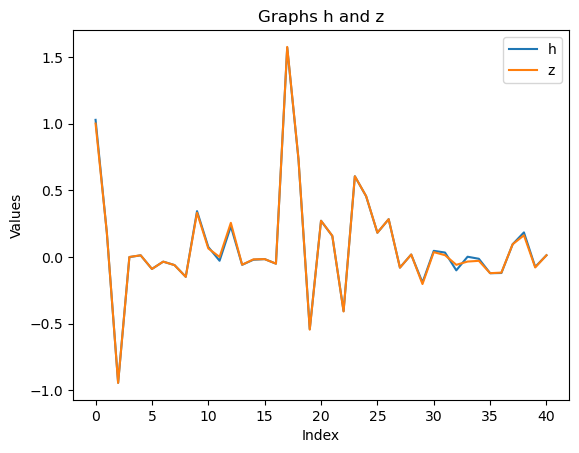

State:

 [[1.02817231]
 [1.01230764]
 [0.97504153]
 [0.98434238]
 [0.98695287]
 [1.02129948]
 [1.00672835]
 [1.04545821]
 [0.98707961]
 [0.98506762]
 [0.99897976]
 [1.0041053 ]
 [0.99748384]
 [0.97248352]]
4


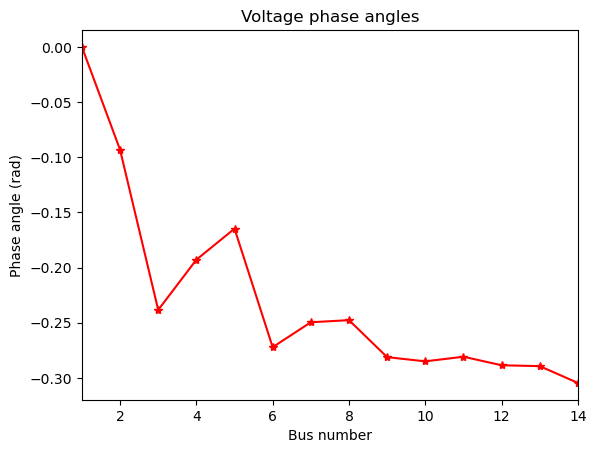

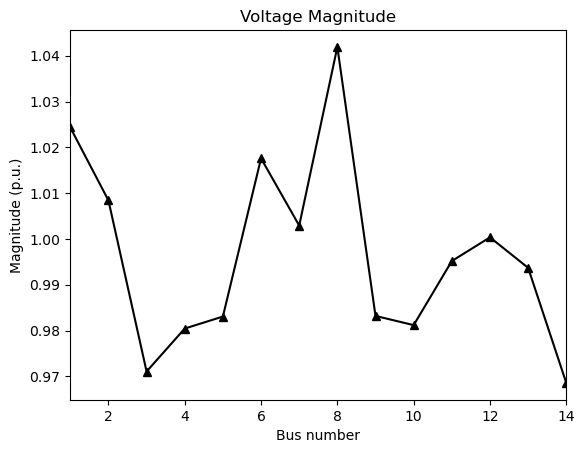

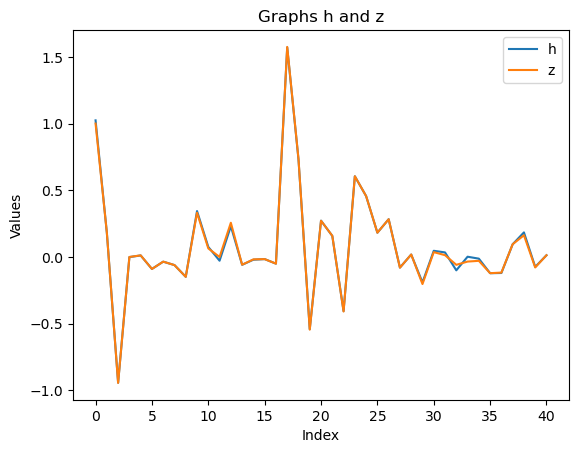

State:

 [[1.02433803]
 [1.00841677]
 [0.9710549 ]
 [0.98043761]
 [0.98305283]
 [1.01759302]
 [1.00291743]
 [1.04192534]
 [0.98318995]
 [0.9811834 ]
 [0.99517407]
 [1.00034499]
 [0.99369596]
 [0.96856281]]
5


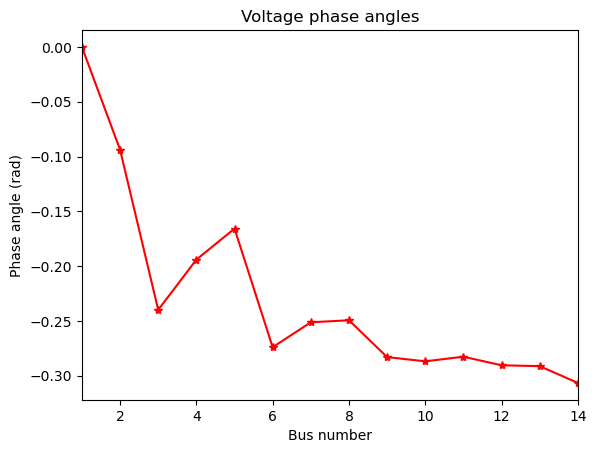

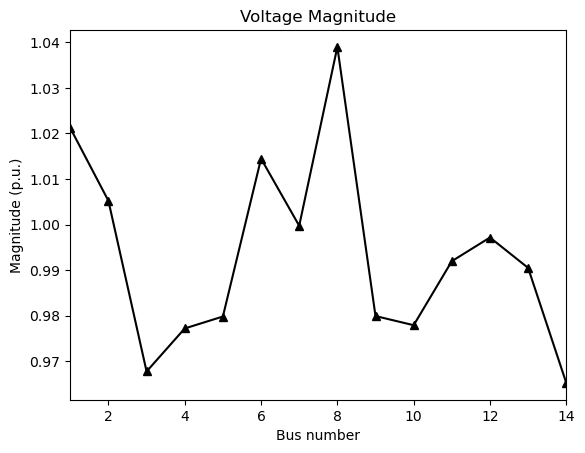

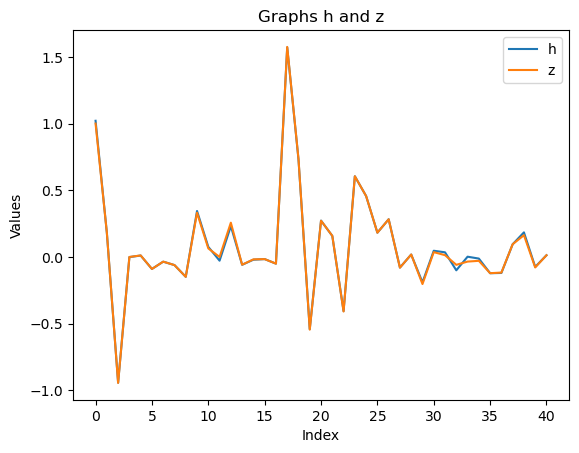

State:

 [[1.02117221]
 [1.00520004]
 [0.96775265]
 [0.97719718]
 [0.97981599]
 [1.01445933]
 [0.99972883]
 [1.03897208]
 [0.97991953]
 [0.9779102 ]
 [0.99195719]
 [0.99715311]
 [0.99048313]
 [0.9652449 ]]
6


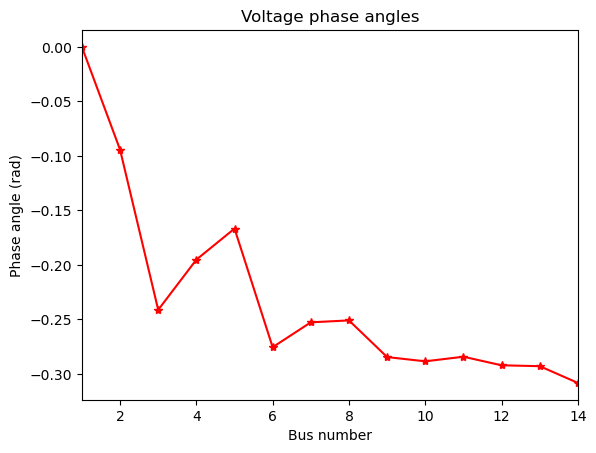

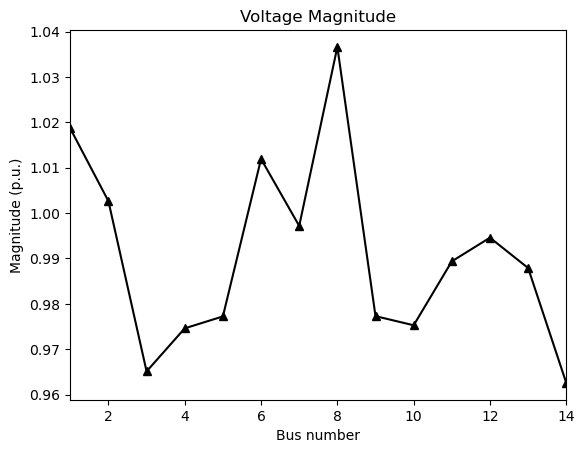

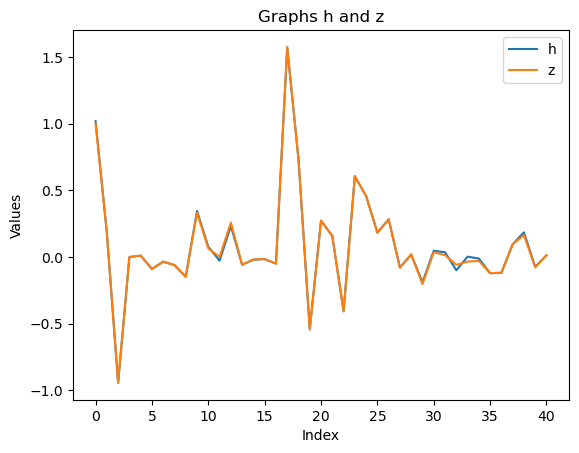

State:

 [[1.01864151]
 [1.00262709]
 [0.96511046]
 [0.97460269]
 [0.97722455]
 [1.01193398]
 [0.997174  ]
 [1.03661893]
 [0.97728985]
 [0.97527623]
 [0.98936556]
 [0.99457815]
 [0.98789191]
 [0.96257222]]
7


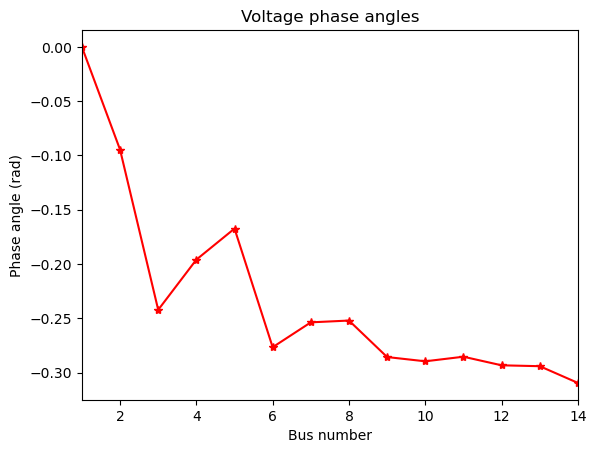

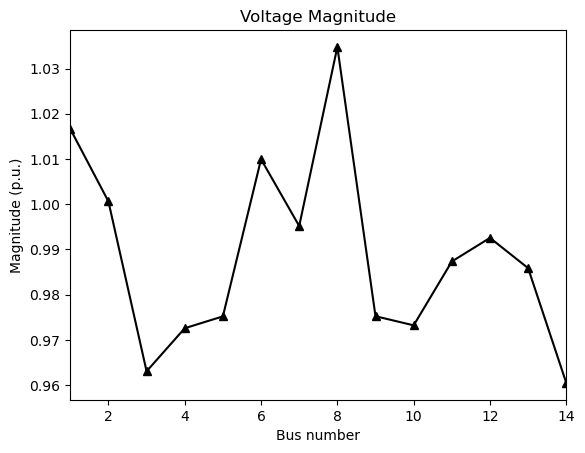

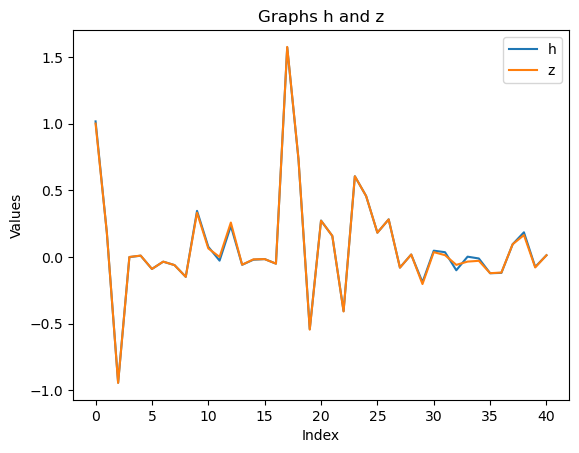

State:

 [[1.0166481 ]
 [1.00060131]
 [0.96303021]
 [0.97256001]
 [0.97518376]
 [1.00994196]
 [0.99516651]
 [1.03478514]
 [0.97521597]
 [0.97319881]
 [0.98732117]
 [0.99254601]
 [0.98584666]
 [0.96046225]]
8


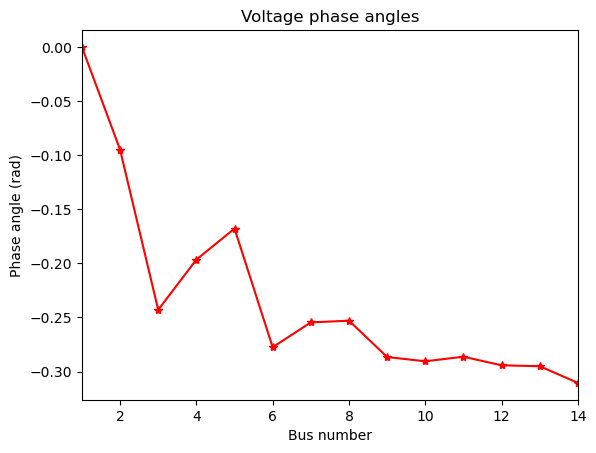

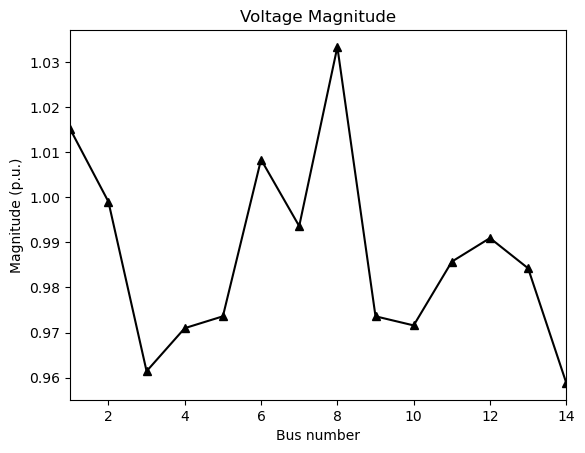

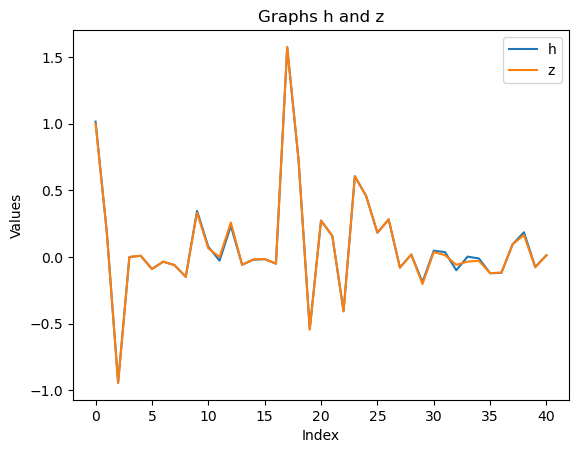

State:

 [[1.01509559]
 [0.9990245 ]
 [0.96141171]
 [0.97097048]
 [0.97359557]
 [1.00838864]
 [0.99360883]
 [1.03337801]
 [0.97359871]
 [0.97157873]
 [0.98572686]
 [0.99096108]
 [0.98425153]
 [0.95881648]]
9


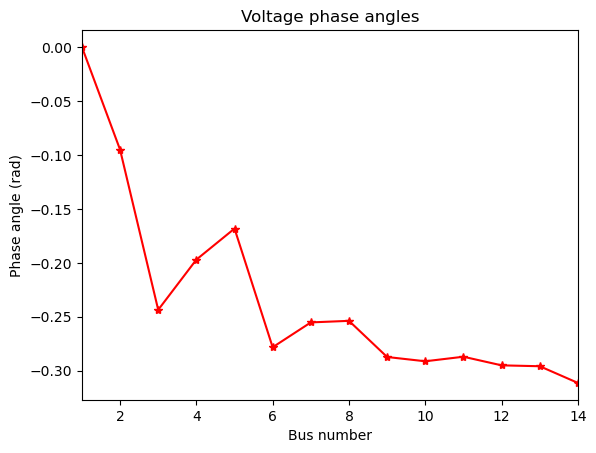

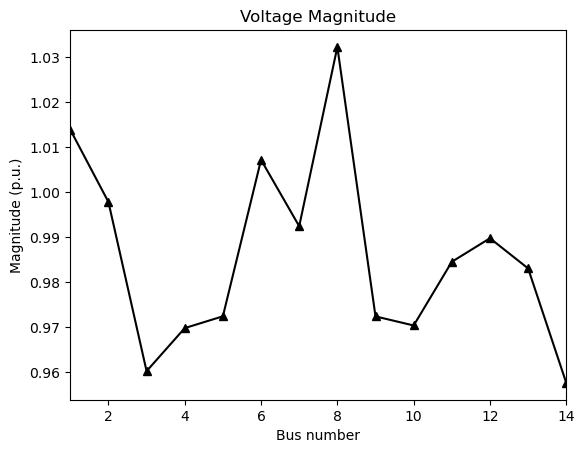

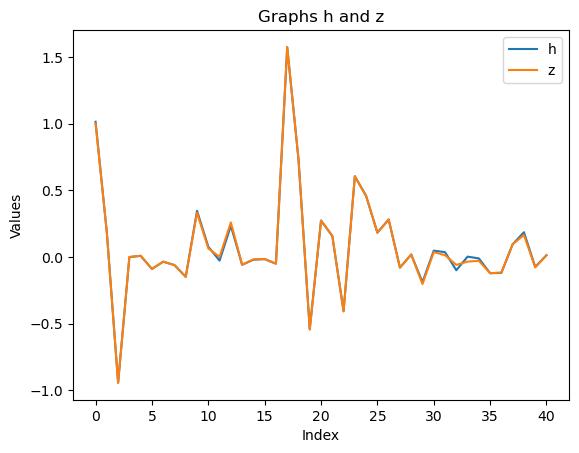

State:

 [[1.01389372]
 [0.9978044 ]
 [0.9601599 ]
 [0.9697411 ]
 [0.97236703]
 [1.00718627]
 [0.99240844]
 [1.03230742]
 [0.97234562]
 [0.97032386]
 [0.98449247]
 [0.98973401]
 [0.9830164 ]
 [0.95754202]]
10


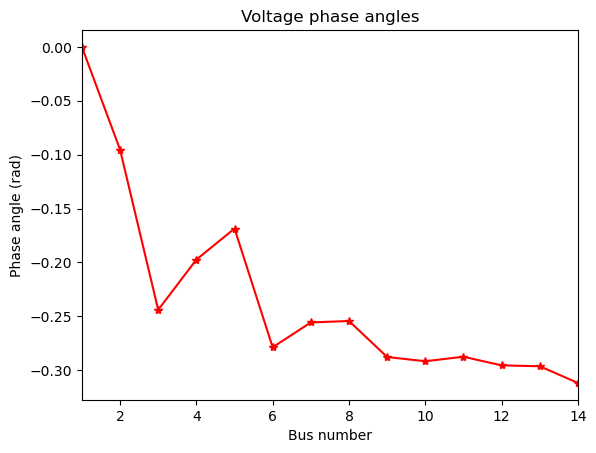

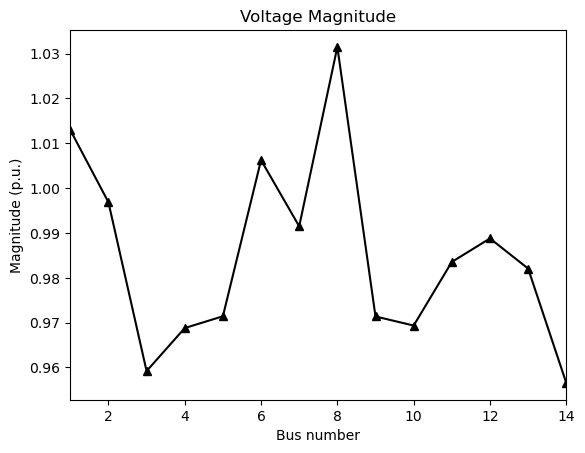

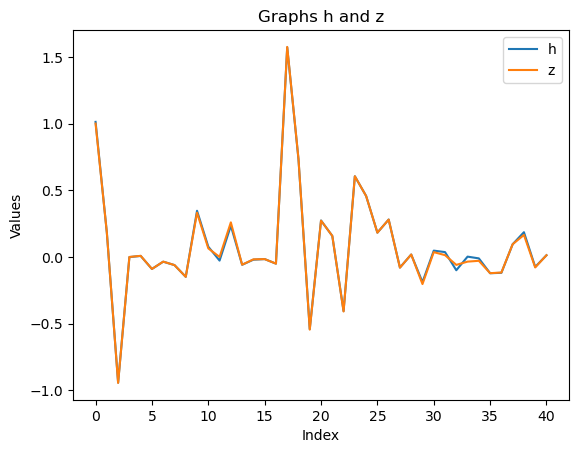

State:

 [[1.01296732]
 [0.99686452]
 [0.95919646]
 [0.96879453]
 [0.9714214 ]
 [1.00625685]
 [0.99148863]
 [1.03150119]
 [0.97137864]
 [0.96935523]
 [0.98353896]
 [0.98878527]
 [0.9820615 ]
 [0.95655712]]
11


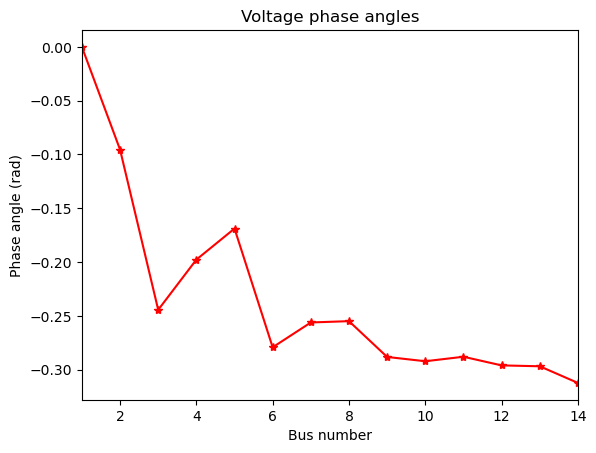

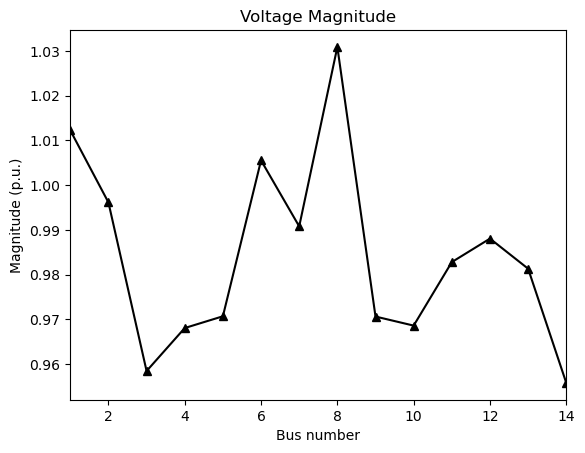

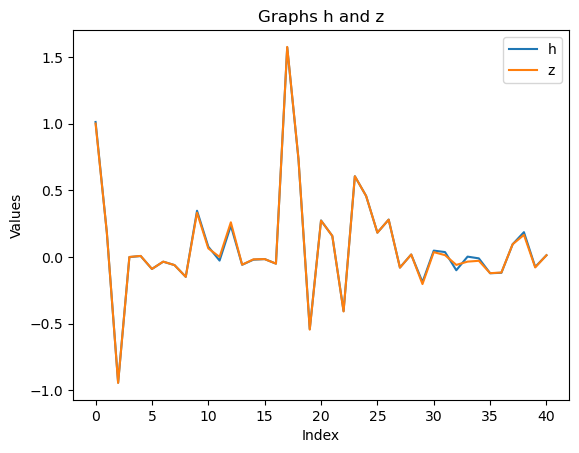

State:

 [[1.01225376]
 [0.99614137]
 [0.95845579]
 [0.9680664 ]
 [0.97069347]
 [1.00554071]
 [0.99078541]
 [1.0308982 ]
 [0.97063303]
 [0.96860854]
 [0.98280415]
 [0.98805418]
 [0.98132551]
 [0.95579749]]
12


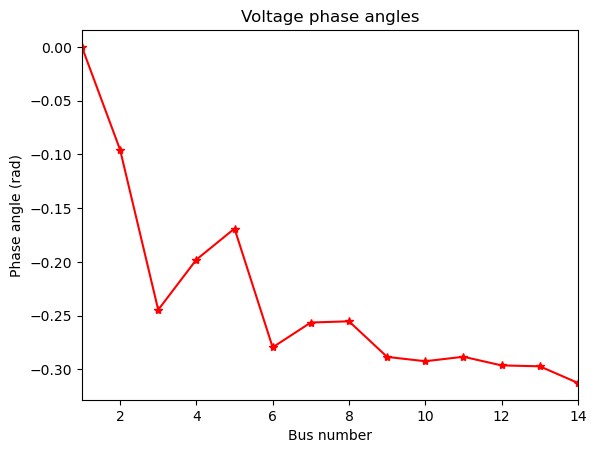

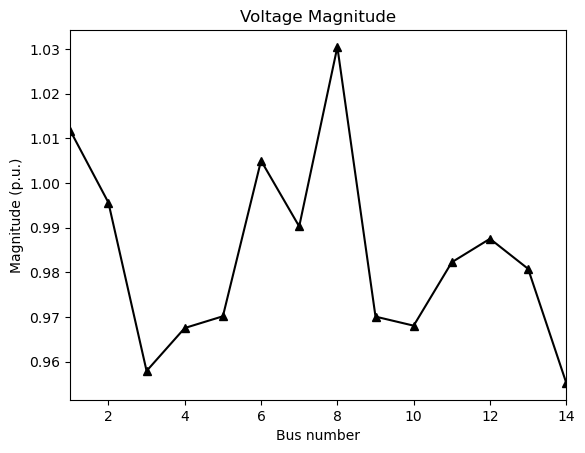

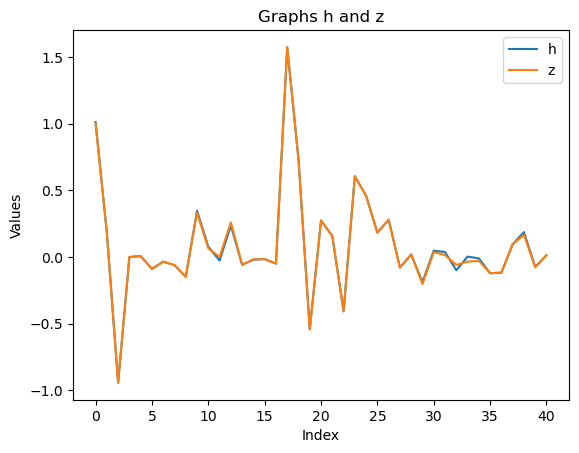

State:

 [[1.0117092 ]
 [0.99558865]
 [0.95789018]
 [0.96751013]
 [0.9701372 ]
 [1.00499111]
 [0.9902518 ]
 [1.03045224]
 [0.97006142]
 [0.96803603]
 [0.98224055]
 [0.987493  ]
 [0.98076058]
 [0.95521472]]
13


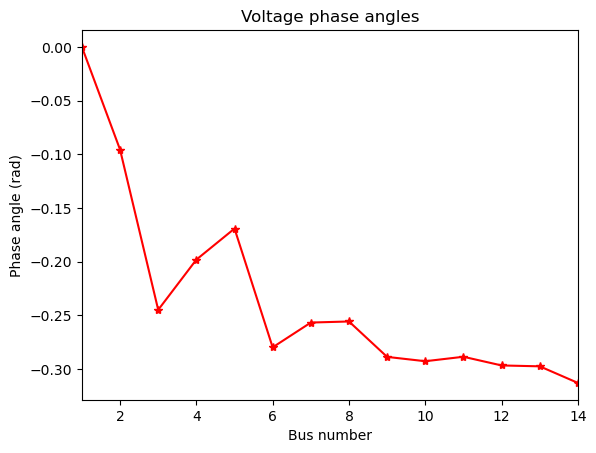

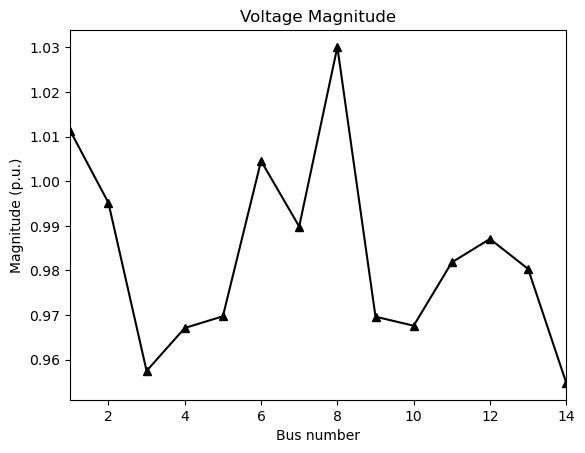

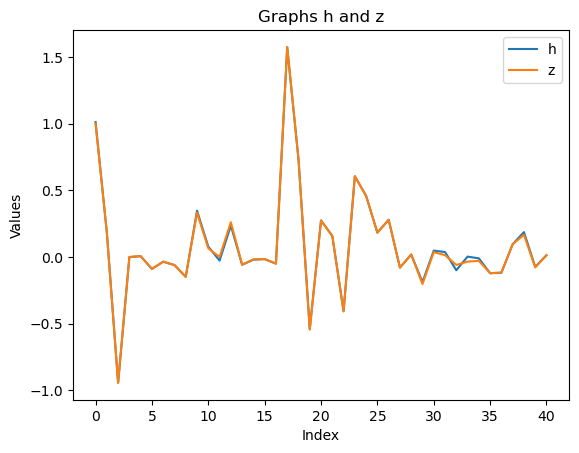

State:

 [[1.01128741]
 [0.99516243]
 [0.95745499]
 [0.96708161]
 [0.96970851]
 [1.0045679 ]
 [0.98984484]
 [1.03012372]
 [0.9696202 ]
 [0.96759452]
 [0.98180632]
 [0.98706114]
 [0.98032596]
 [0.95476609]]
14


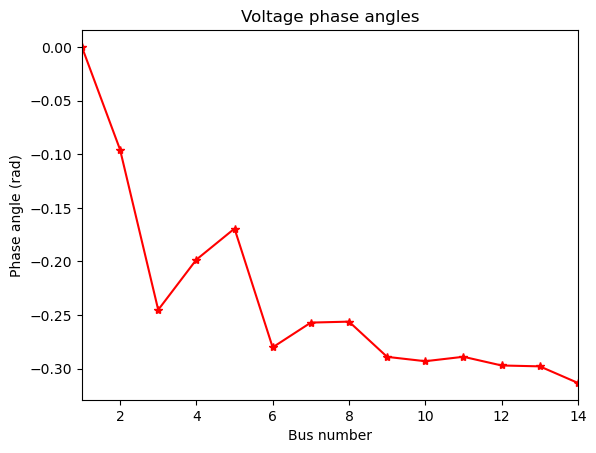

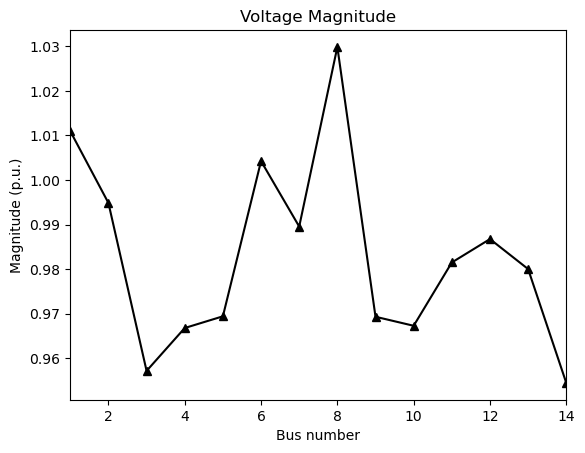

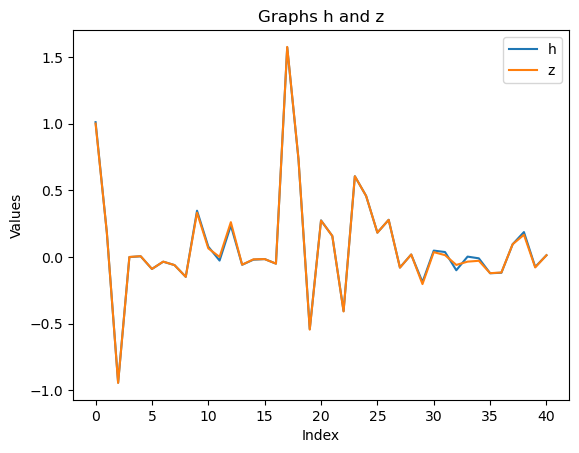

State:

 [[1.01096335]
 [0.99483563]
 [0.95712224]
 [0.96675399]
 [0.96938059]
 [1.00424267]
 [0.98953658]
 [1.02988492]
 [0.96928043]
 [0.96725482]
 [0.98147257]
 [0.98672893]
 [0.97999138]
 [0.9544199 ]]
15


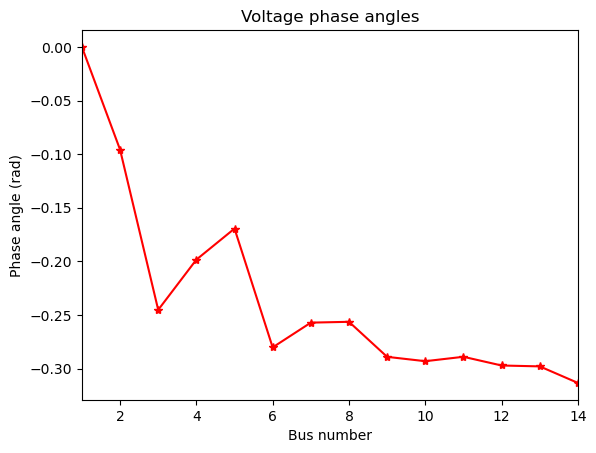

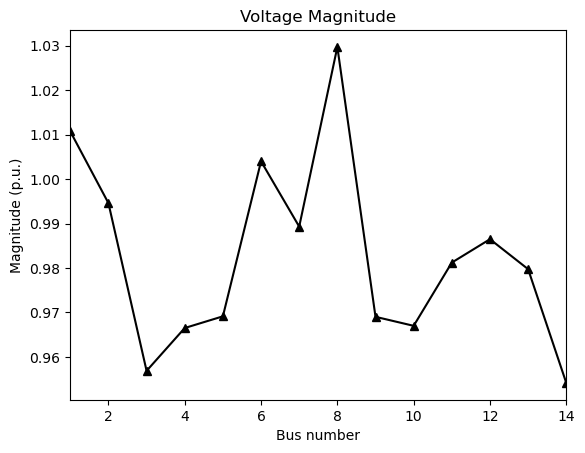

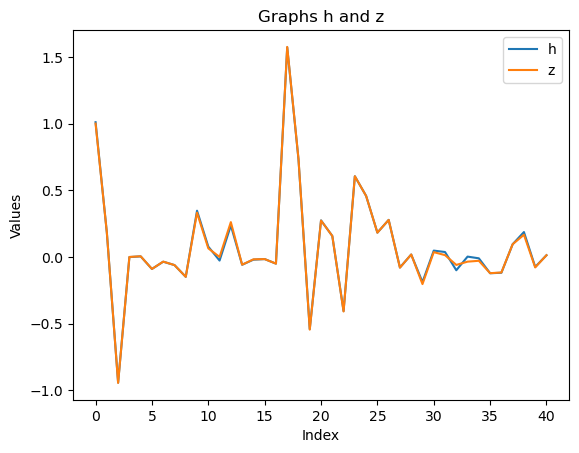

State:

 [[1.01071493]
 [0.99458573]
 [0.95686859]
 [0.96650377]
 [0.96912996]
 [1.00399238]
 [0.98930427]
 [1.02971449]
 [0.96902017]
 [0.96699435]
 [0.98121617]
 [0.98647317]
 [0.97973372]
 [0.95415405]]
16


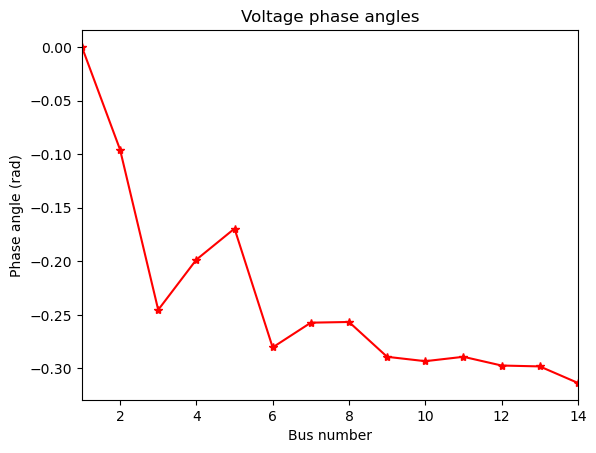

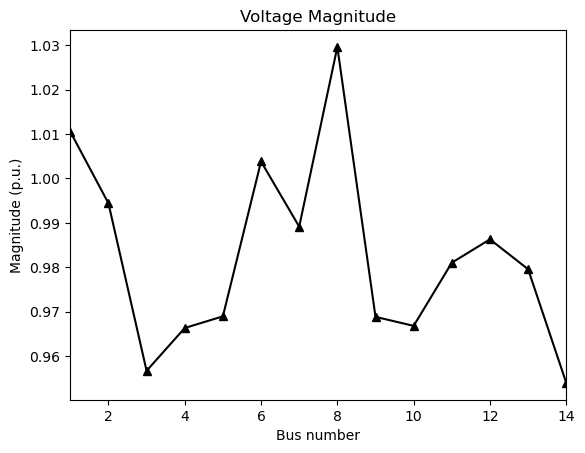

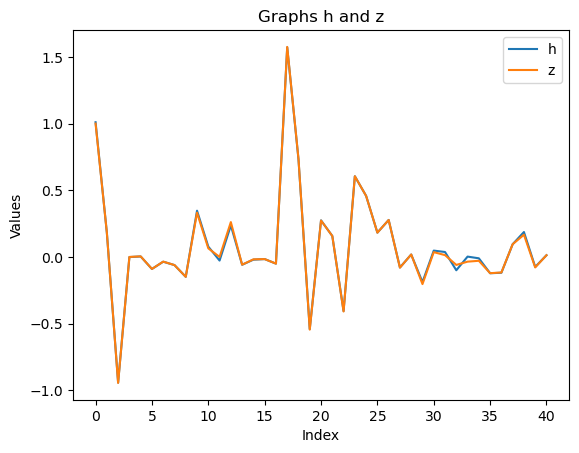

State:

 [[1.01052432]
 [0.99439475]
 [0.95667554]
 [0.9663132 ]
 [0.9689388 ]
 [1.00380011]
 [0.98912955]
 [1.02959296]
 [0.96882071]
 [0.96679477]
 [0.98101948]
 [0.98627651]
 [0.97953558]
 [0.95394972]]
17


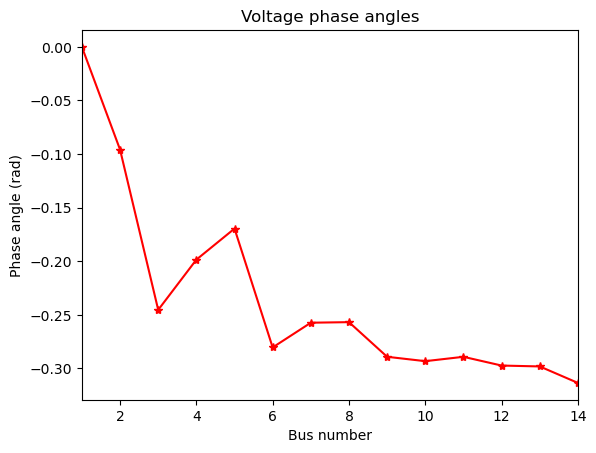

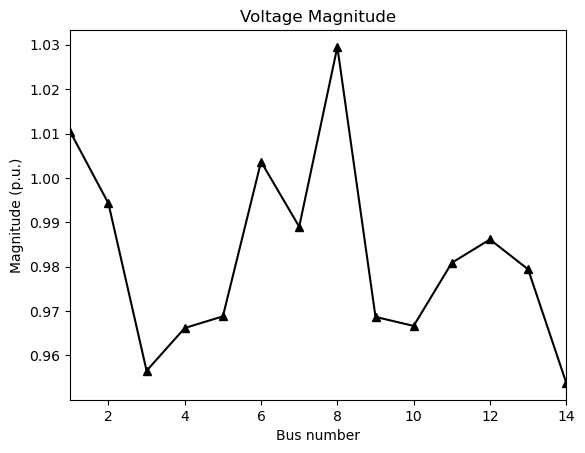

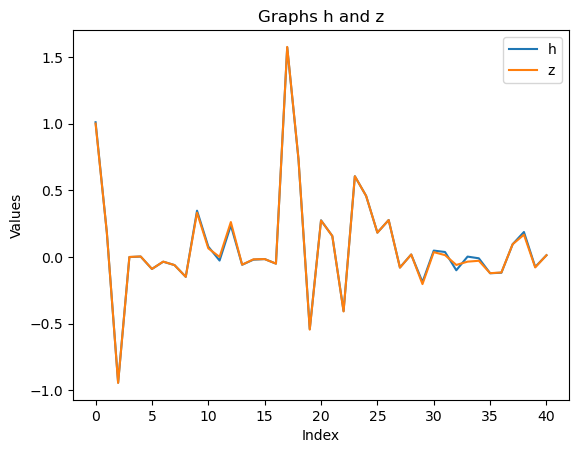

State:

 [[1.01037796]
 [0.99424864]
 [0.95652881]
 [0.96616802]
 [0.9687931 ]
 [1.00365388]
 [0.98899922]
 [1.02951128]
 [0.96866787]
 [0.96664218]
 [0.98086966]
 [0.98612681]
 [0.97938473]
 [0.9537934 ]]
18


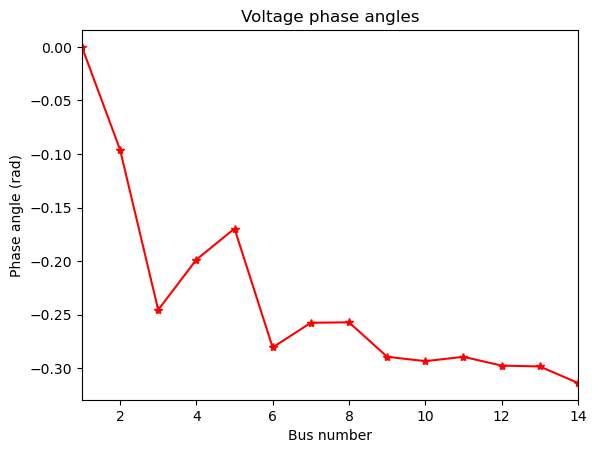

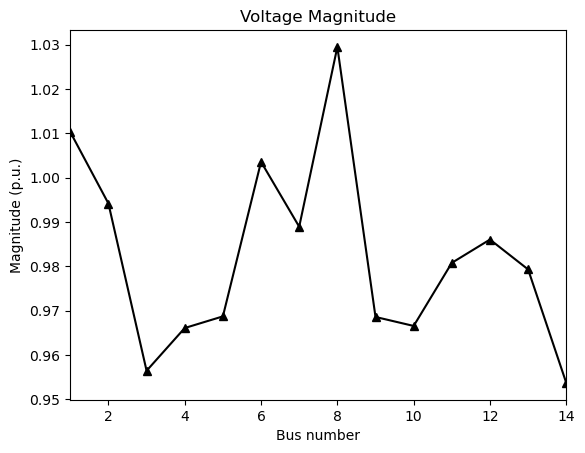

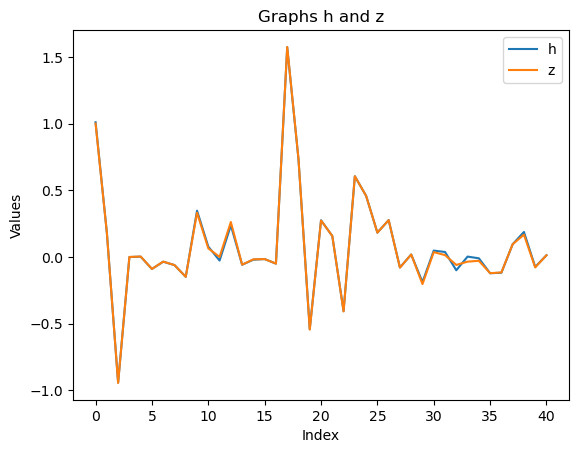

State:

 [[1.01026503]
 [0.99413725]
 [0.95641807]
 [0.96605837]
 [0.96868244]
 [1.00354184]
 [0.98890251]
 [1.02945566]
 [0.96855156]
 [0.96652594]
 [0.98075519]
 [0.98601211]
 [0.97926902]
 [0.9536748 ]]
19


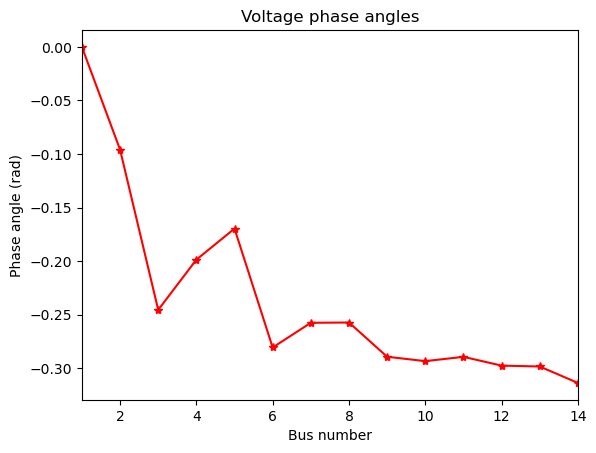

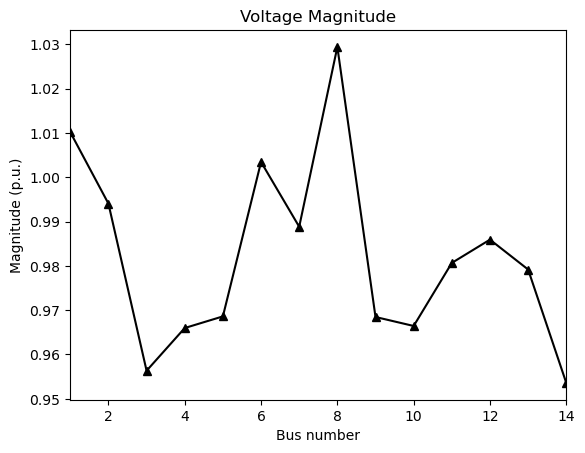

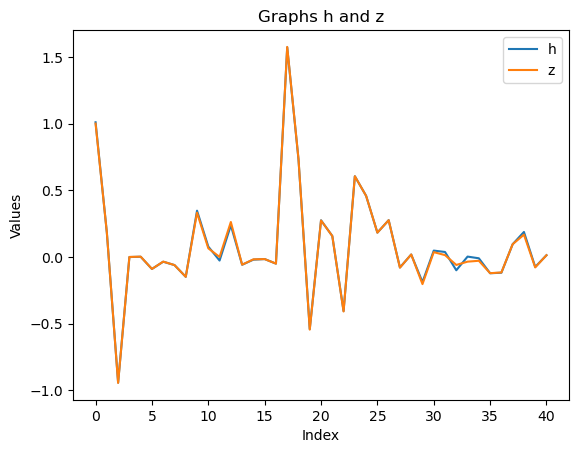

State:

 [[1.01017973]
 [0.99405341]
 [0.95633525]
 [0.9659758 ]
 [0.96859914]
 [1.00345647]
 [0.98883143]
 [1.02942075]
 [0.96846308]
 [0.96643754]
 [0.98066806]
 [0.98592462]
 [0.9791807 ]
 [0.95358358]]
20


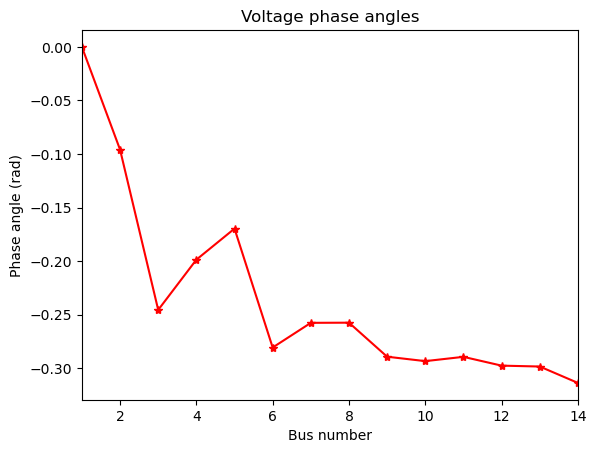

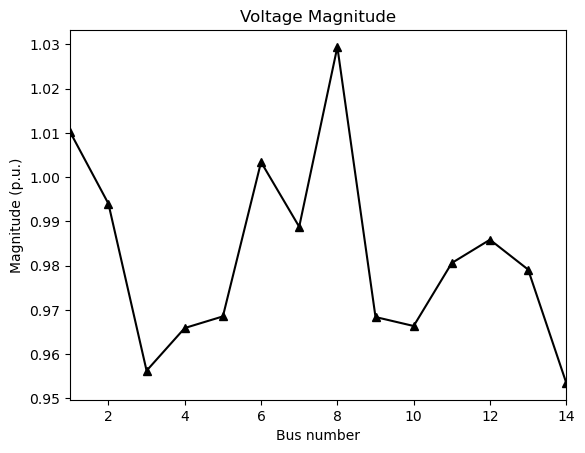

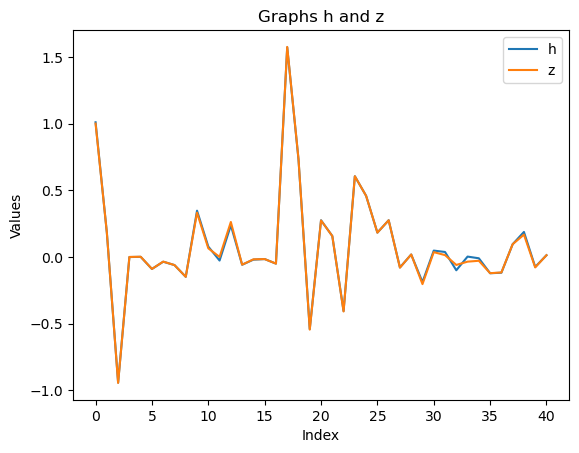

State:

 [[1.01011385]
 [0.99398928]
 [0.95627313]
 [0.96591353]
 [0.96853622]
 [1.00339293]
 [0.98877872]
 [1.02939728]
 [0.96839567]
 [0.96637068]
 [0.98060291]
 [0.98585925]
 [0.97911474]
 [0.95351447]]
21


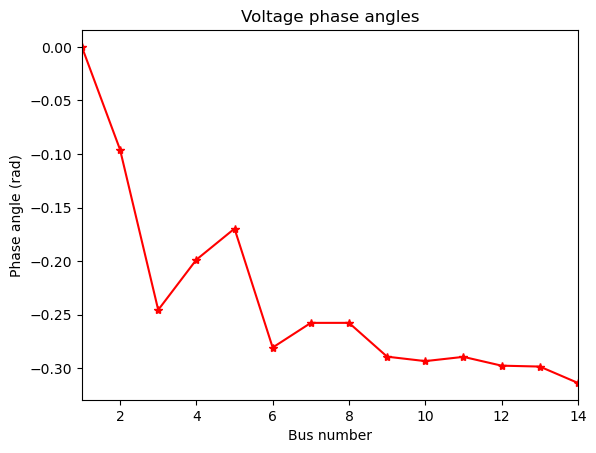

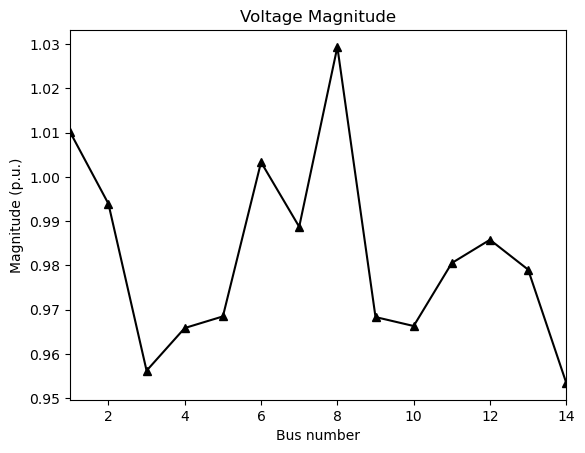

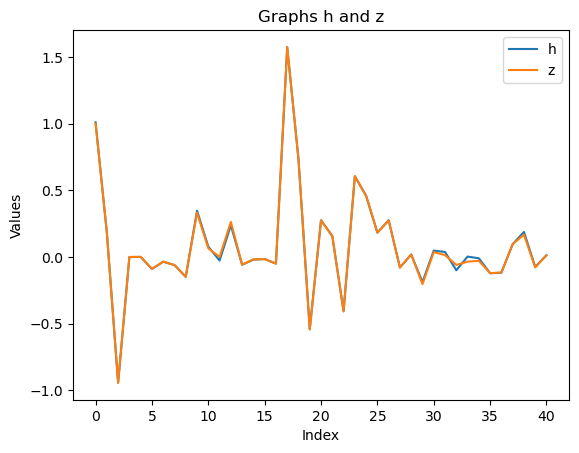

State:

 [[1.01006307]
 [0.99394114]
 [0.9562273 ]
 [0.9658676 ]
 [0.96848953]
 [1.00334365]
 [0.98874099]
 [1.02938389]
 [0.96834591]
 [0.96632085]
 [0.98055324]
 [0.98580859]
 [0.97906348]
 [0.95346213]]
22


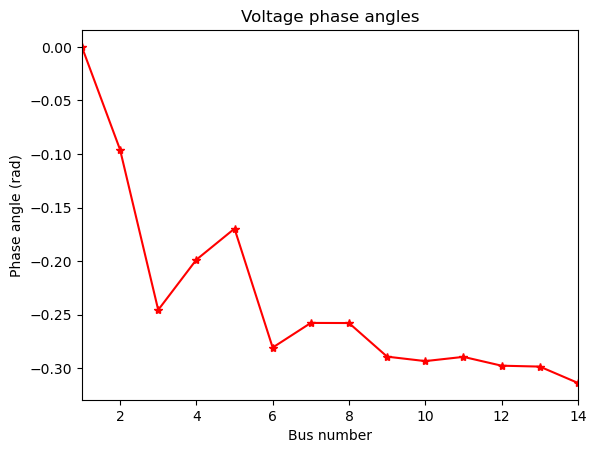

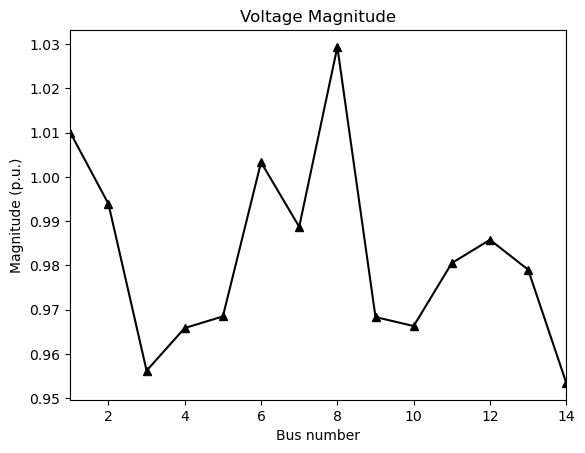

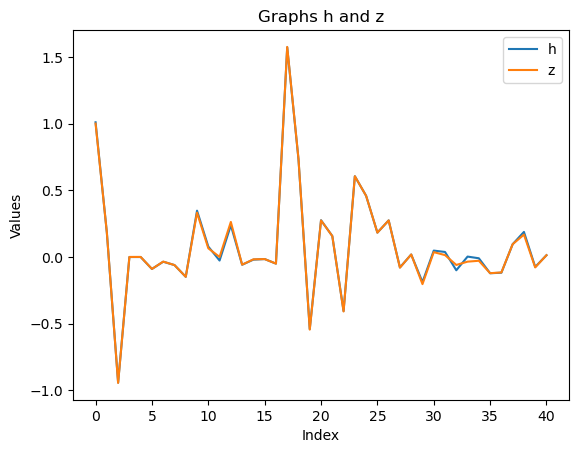

State:

 [[1.01002404]
 [0.99390432]
 [0.95619325]
 [0.9658327 ]
 [0.96845383]
 [1.00330859]
 [0.98871349]
 [1.02937668]
 [0.96830856]
 [0.96628394]
 [0.9805174 ]
 [0.98577237]
 [0.97902676]
 [0.95342341]]
23


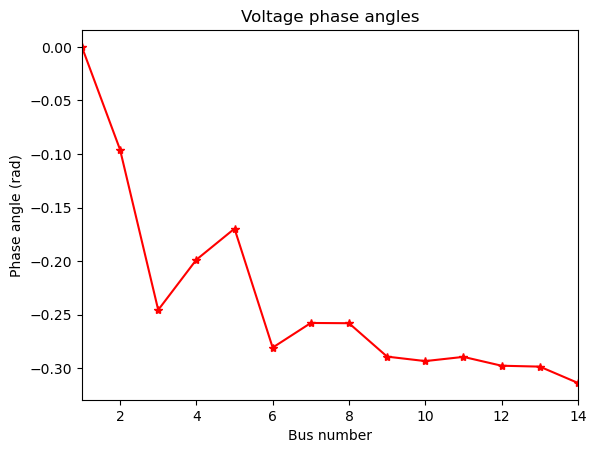

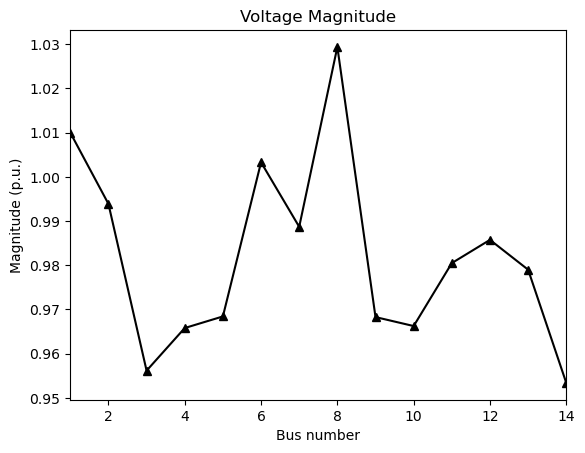

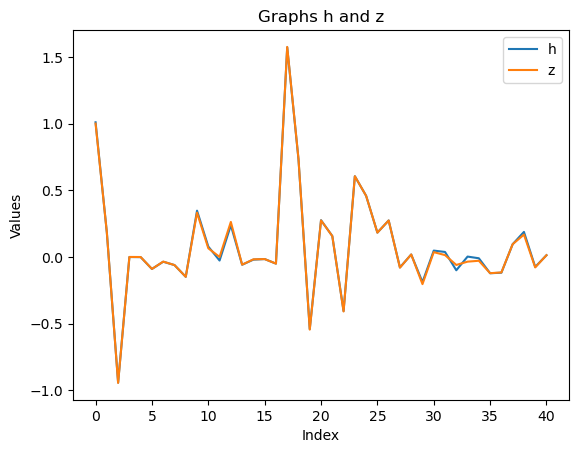

State:

 [[1.0099948 ]
 [0.99387752]
 [0.95616938]
 [0.96580825]
 [0.96842869]
 [1.0032823 ]
 [0.98869415]
 [1.02937112]
 [0.96828186]
 [0.96625738]
 [0.9804911 ]
 [0.98574515]
 [0.97899914]
 [0.95339491]]
24


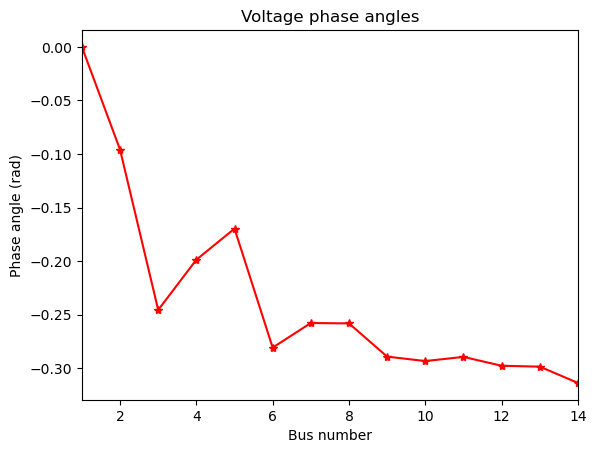

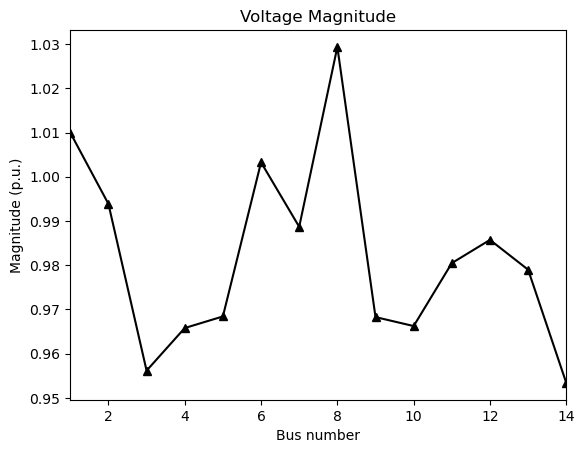

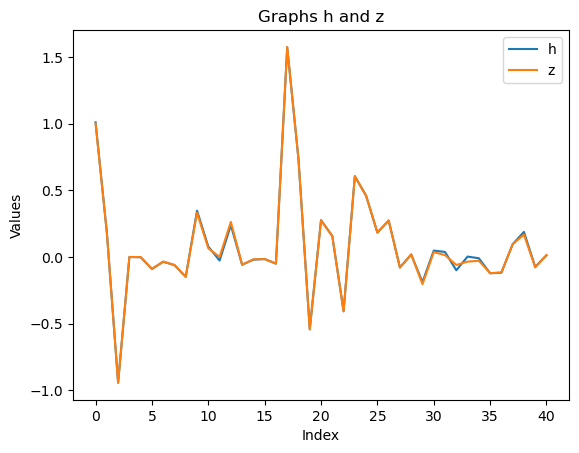

State:

 [[1.00997208]
 [0.99385736]
 [0.95615255]
 [0.96579066]
 [0.96840986]
 [1.00326415]
 [0.98868005]
 [1.02936559]
 [0.96826263]
 [0.96623847]
 [0.98047276]
 [0.98572603]
 [0.97897979]
 [0.95337537]]
25


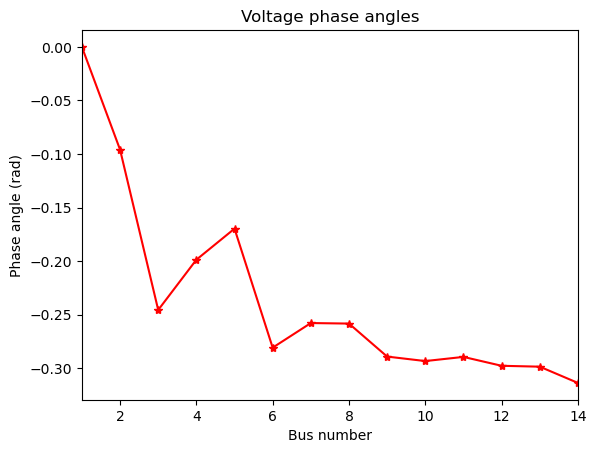

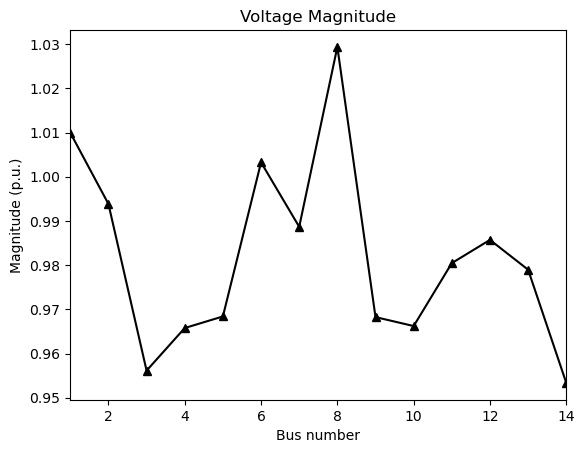

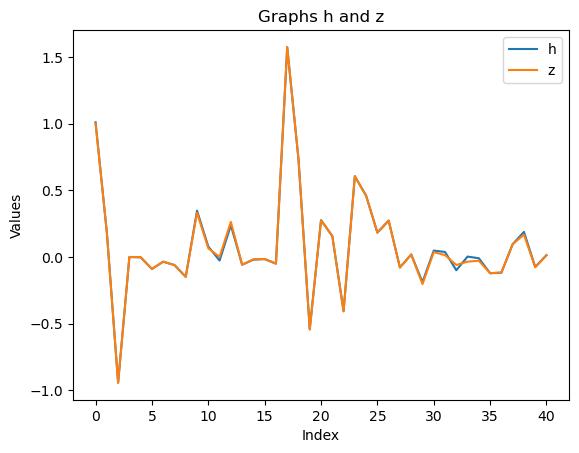

State:

 [[1.0099509 ]
 [0.99384064]
 [0.95613973]
 [0.96577735]
 [0.9683957 ]
 [1.00325074]
 [0.98866916]
 [1.02935948]
 [0.96824857]
 [0.96622472]
 [0.98045936]
 [0.98571202]
 [0.9789654 ]
 [0.95336015]]
26


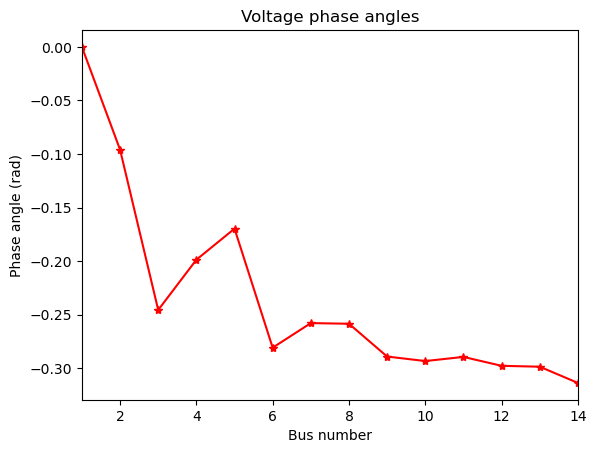

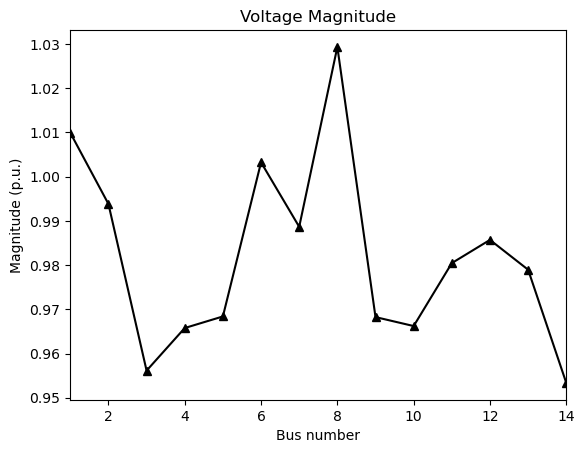

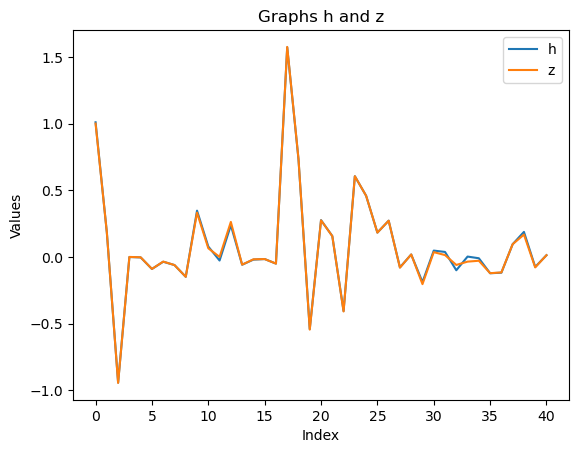

State:

 [[1.00993786]
 [0.9938303 ]
 [0.95613286]
 [0.96576934]
 [0.96838686]
 [1.00324435]
 [0.98866196]
 [1.0293515 ]
 [0.96824104]
 [0.96621759]
 [0.98045283]
 [0.9857049 ]
 [0.97895795]
 [0.95335167]]
27


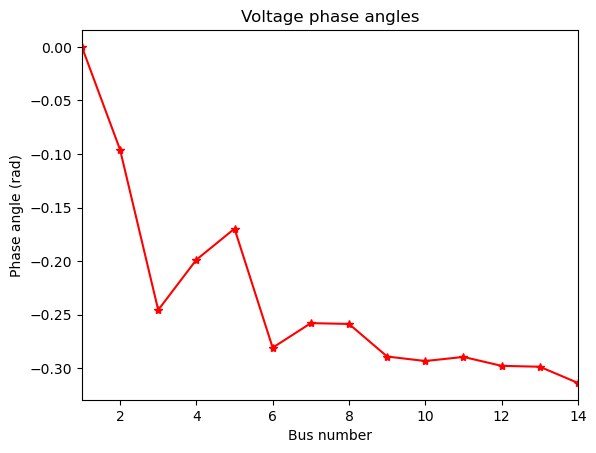

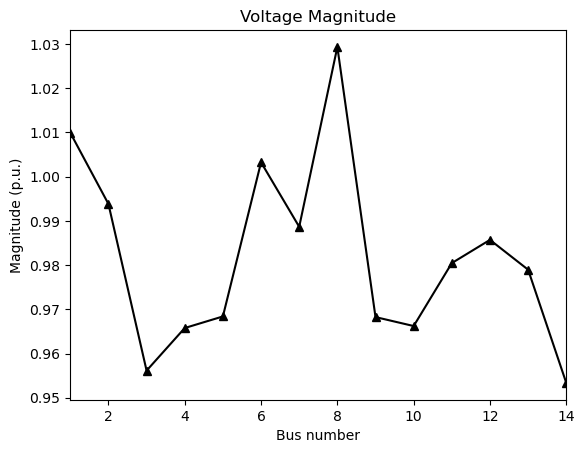

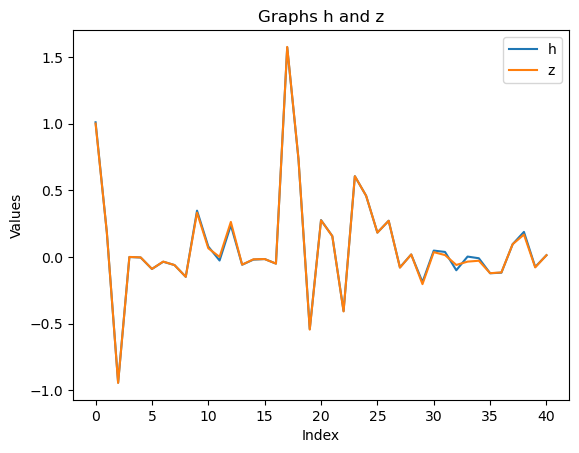

State:

 [[1.00992815]
 [0.99382329]
 [0.95612966]
 [0.96576534]
 [0.96838203]
 [1.00324191]
 [0.98865674]
 [1.02933925]
 [0.968238  ]
 [0.96621492]
 [0.98045059]
 [0.98570191]
 [0.97895474]
 [0.95334771]]
28


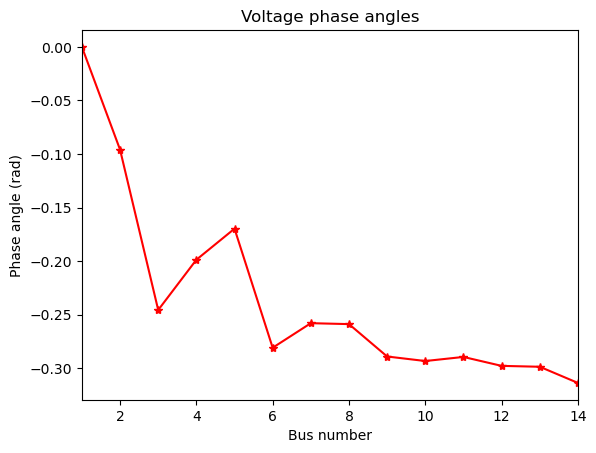

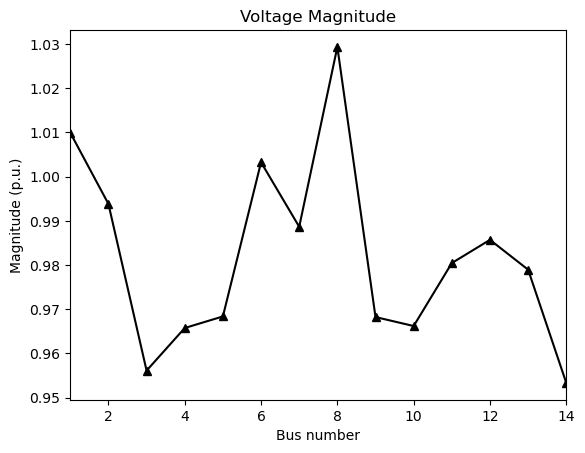

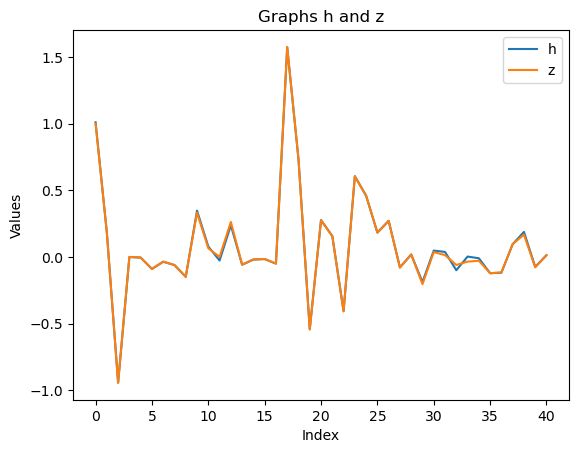

State:

 [[1.00992126]
 [0.99381925]
 [0.95612936]
 [0.96576382]
 [0.96837967]
 [1.00324224]
 [0.98865279]
 [1.02932449]
 [0.96823815]
 [0.96621526]
 [0.98045113]
 [0.98570177]
 [0.9789544 ]
 [0.95334688]]
29


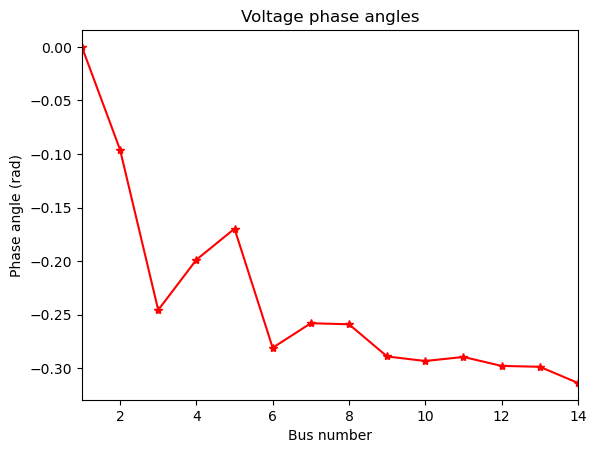

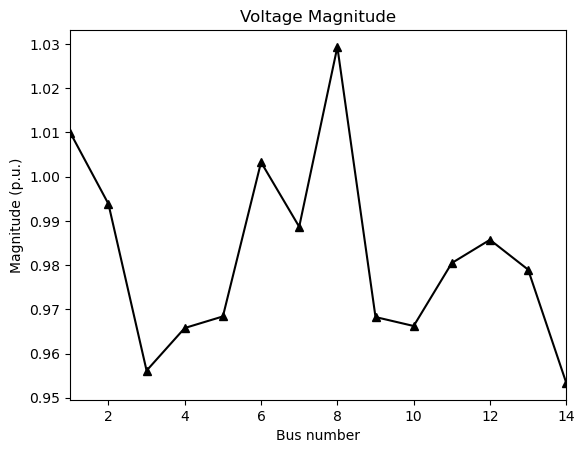

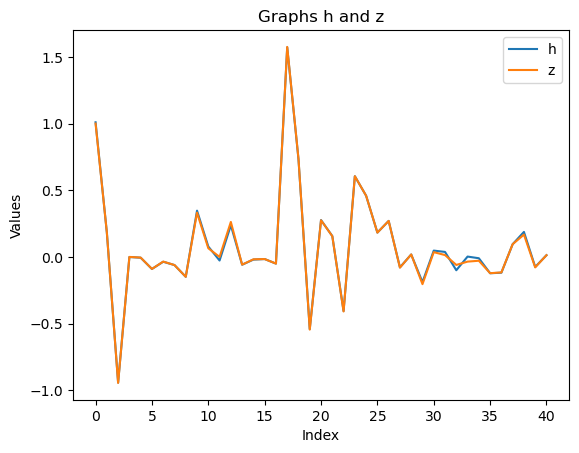

State:

 [[1.00991559]
 [0.99381632]
 [0.95613038]
 [0.96576405]
 [0.96837862]
 [1.00324576]
 [0.98864957]
 [1.02930684]
 [0.96824096]
 [0.96621853]
 [0.98045489]
 [0.98570494]
 [0.97895731]
 [0.95334903]]
30


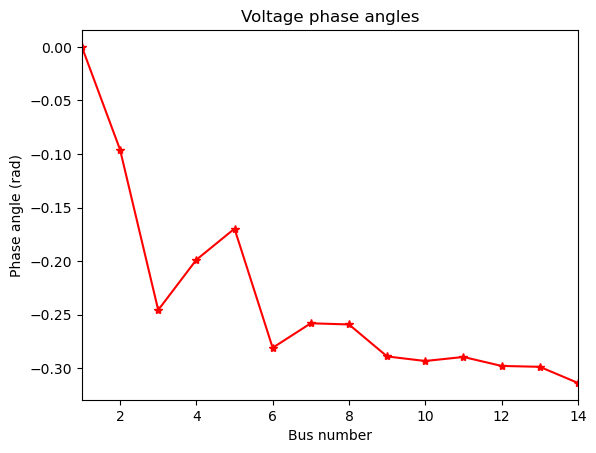

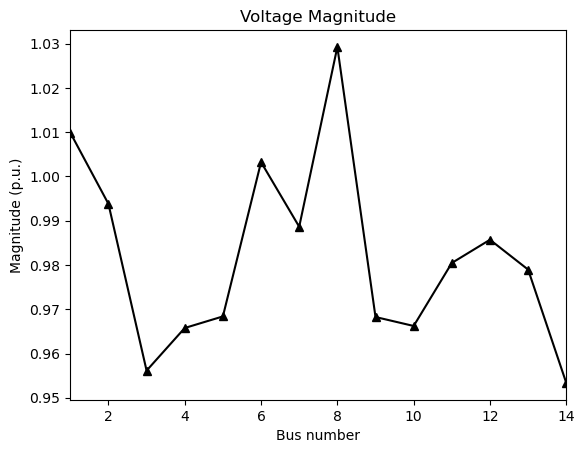

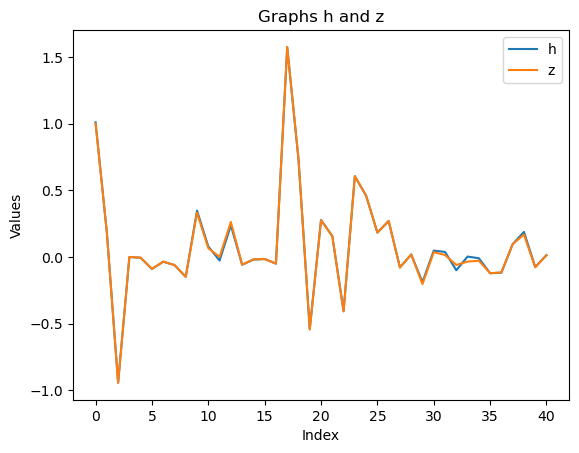

State:

 [[1.00990869]
 [0.99381357]
 [0.95613195]
 [0.96576482]
 [0.96837855]
 [1.00324879]
 [0.98864476]
 [1.02928155]
 [0.96824455]
 [0.96622222]
 [0.98045848]
 [0.98570751]
 [0.97895967]
 [0.95335129]]
31


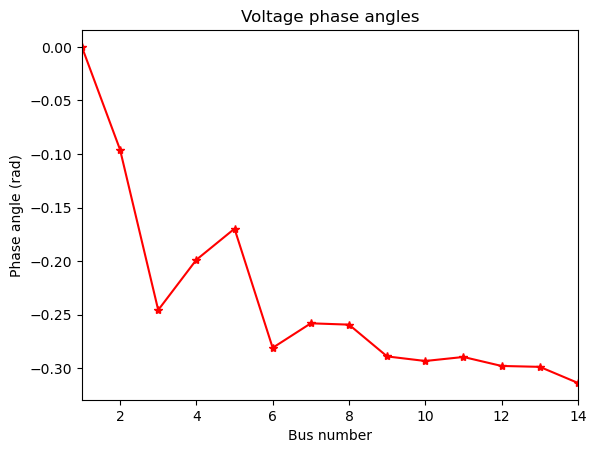

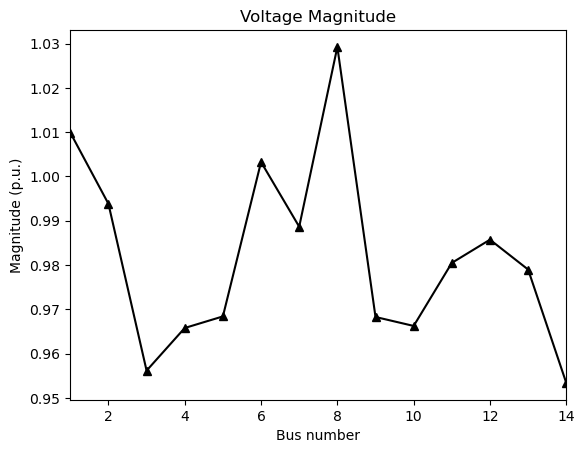

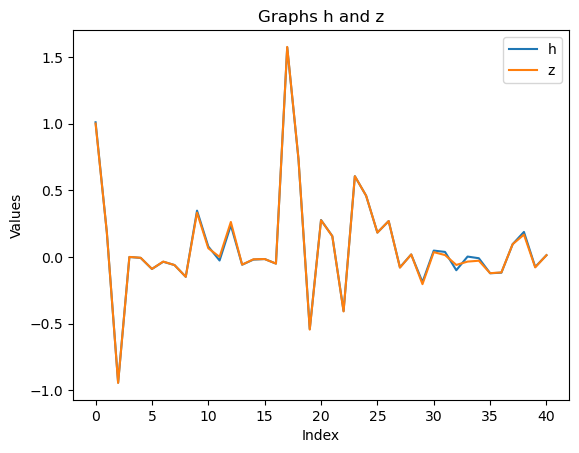

State:

 [[1.00990561]
 [0.99381339]
 [0.95613542]
 [0.96576717]
 [0.96838003]
 [1.00325657]
 [0.98864008]
 [1.02925092]
 [0.96825115]
 [0.96622928]
 [0.98046622]
 [0.98571489]
 [0.97896689]
 [0.95335828]]
32


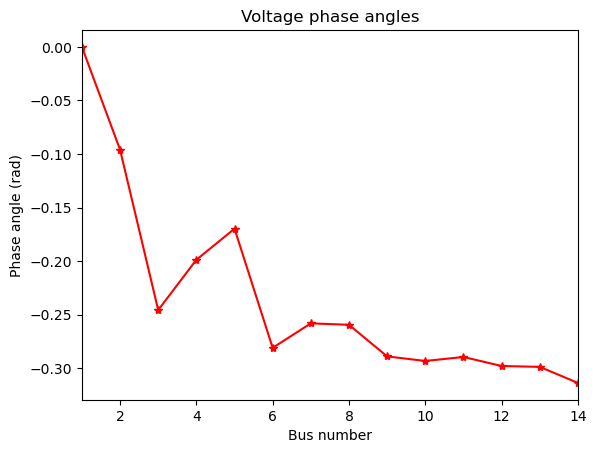

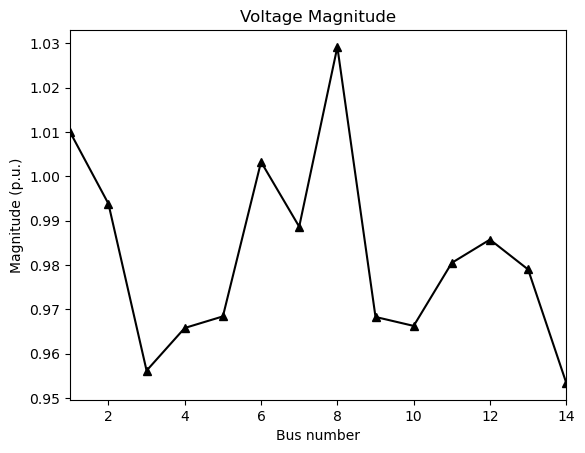

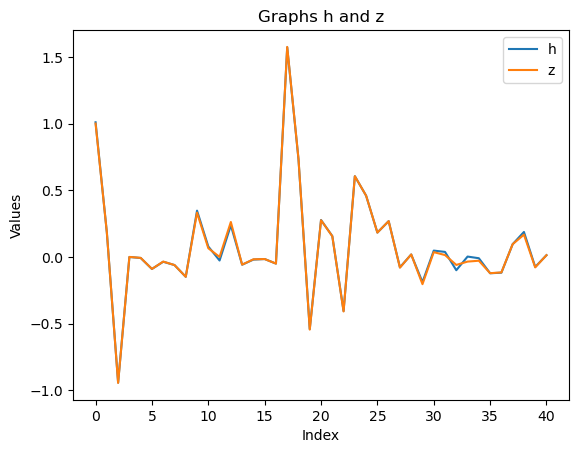

State:

 [[1.00990365]
 [0.99381432]
 [0.95614049]
 [0.96577116]
 [0.96838318]
 [1.0032647 ]
 [0.98863575]
 [1.02921692]
 [0.96826002]
 [0.96623815]
 [0.98047494]
 [0.98572263]
 [0.97897456]
 [0.95336607]]
33


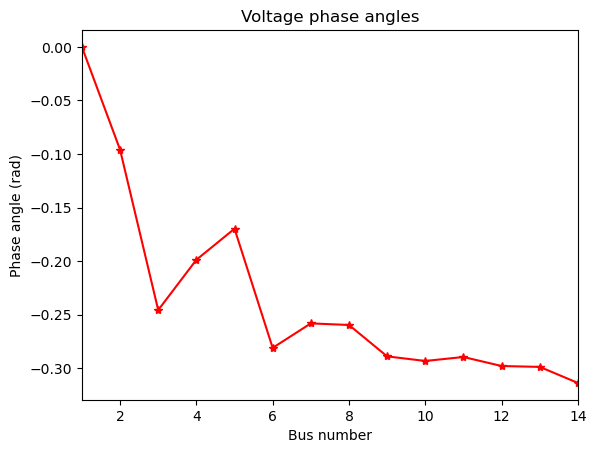

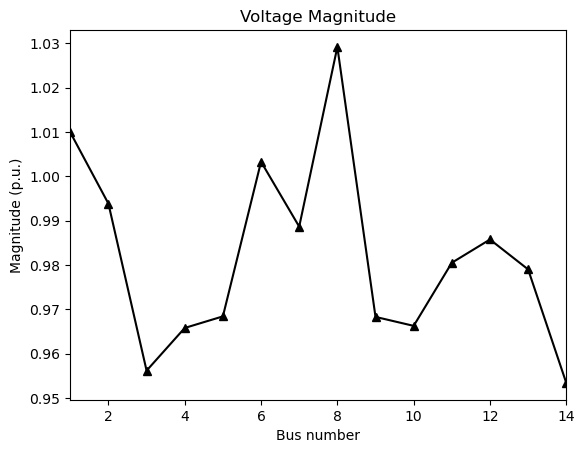

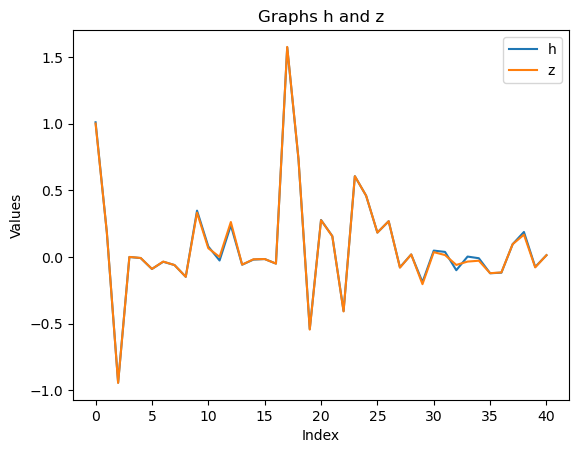

State:

 [[1.00990266]
 [0.99381614]
 [0.95614636]
 [0.96577594]
 [0.96838698]
 [1.00327497]
 [0.98863043]
 [1.02917752]
 [0.96826934]
 [0.96624793]
 [0.9804854 ]
 [0.98573261]
 [0.97898428]
 [0.95337502]]
34


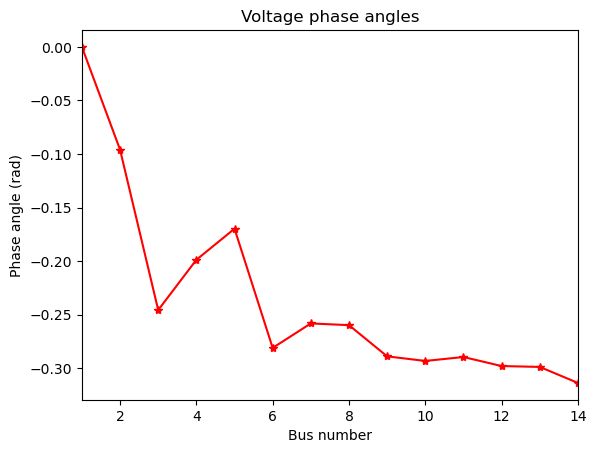

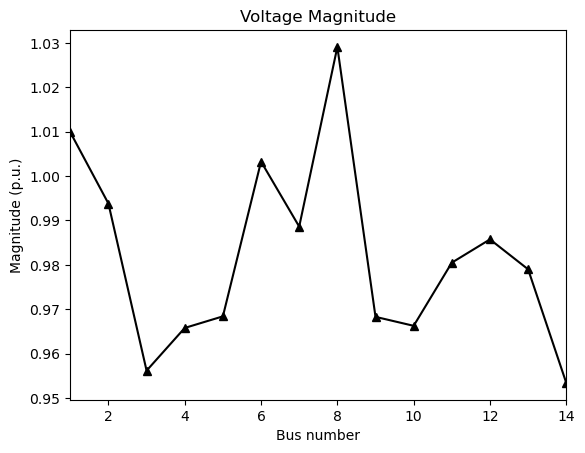

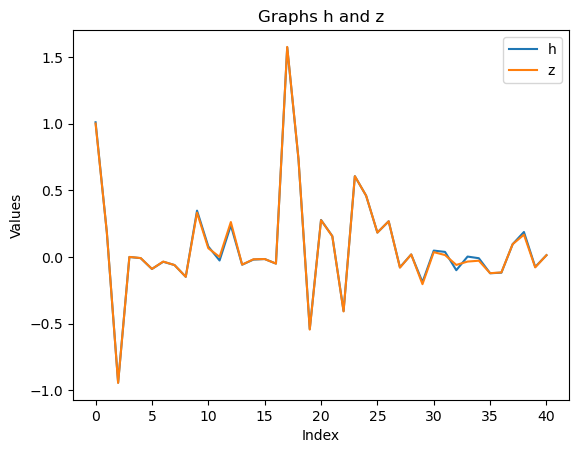

State:

 [[1.00989859]
 [0.99381571]
 [0.95615021]
 [0.96577932]
 [0.96838949]
 [1.00328486]
 [0.98862252]
 [1.02913038]
 [0.96827898]
 [0.96625781]
 [0.98049553]
 [0.98574217]
 [0.97899377]
 [0.95338407]]
35


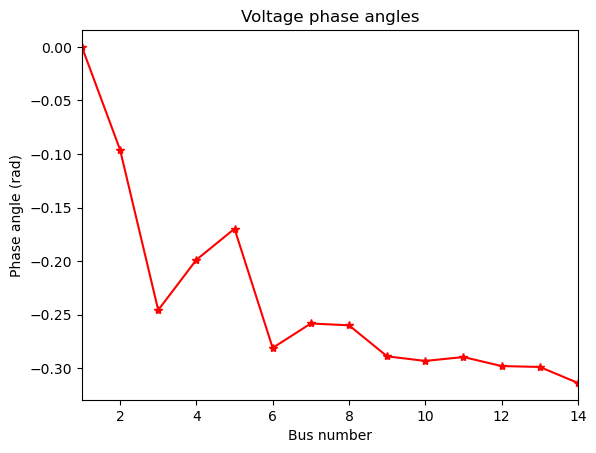

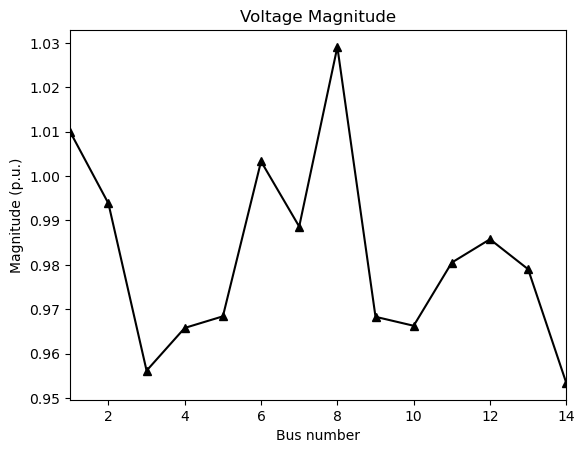

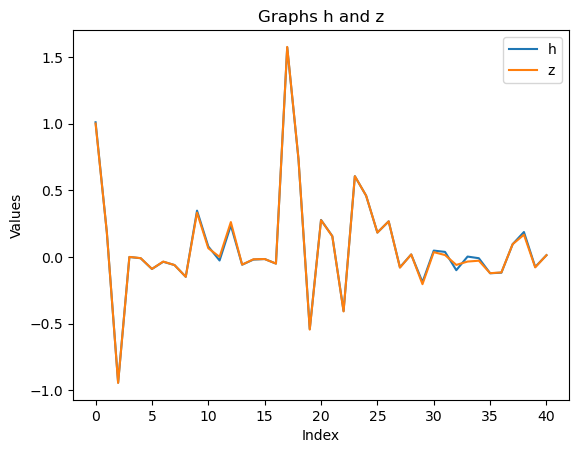

State:

 [[1.00989829]
 [0.99381824]
 [0.95615667]
 [0.96578478]
 [0.96839409]
 [1.00329798]
 [0.98861491]
 [1.0290785 ]
 [0.96829105]
 [0.96627032]
 [0.98050878]
 [0.98575504]
 [0.9790065 ]
 [0.9533959 ]]
36


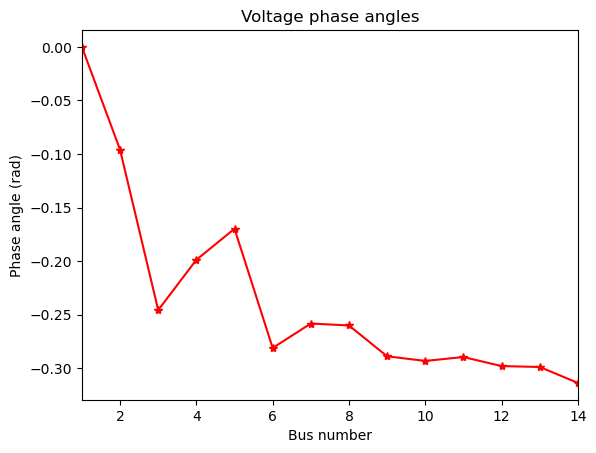

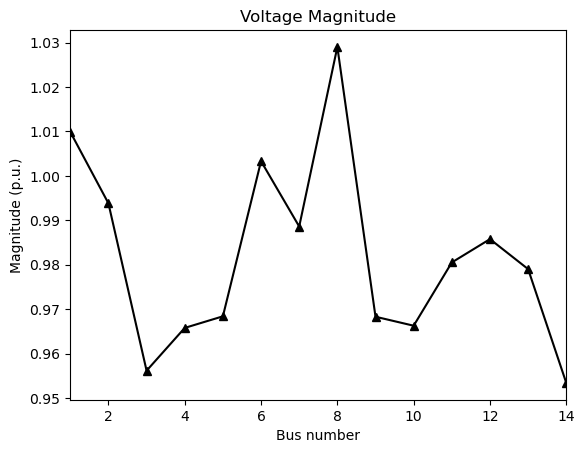

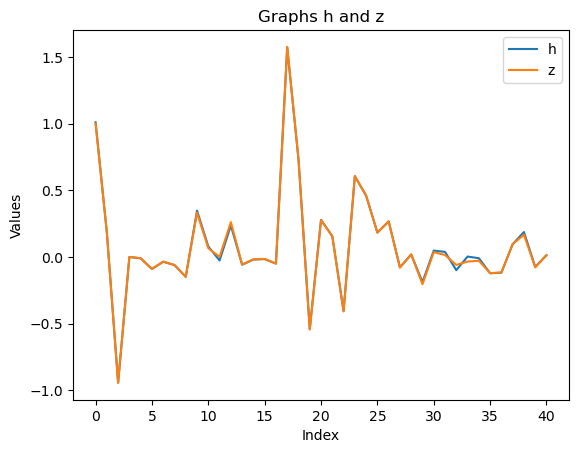

State:

 [[1.00989827]
 [0.99382059]
 [0.95616278]
 [0.9657899 ]
 [0.96839823]
 [1.00331132]
 [0.98860608]
 [1.02902138]
 [0.96830453]
 [0.96628387]
 [0.98052244]
 [0.98576809]
 [0.97901935]
 [0.95340925]]
37


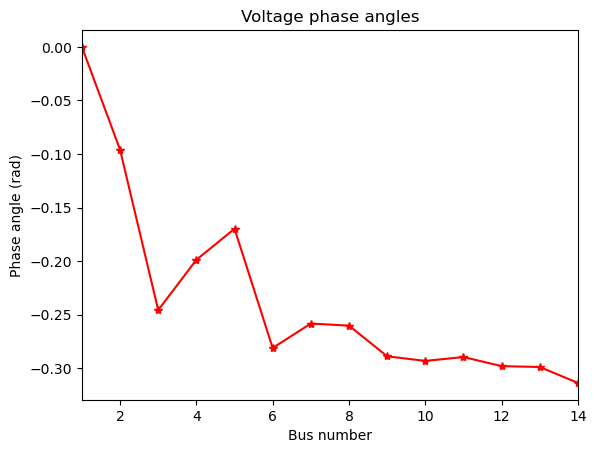

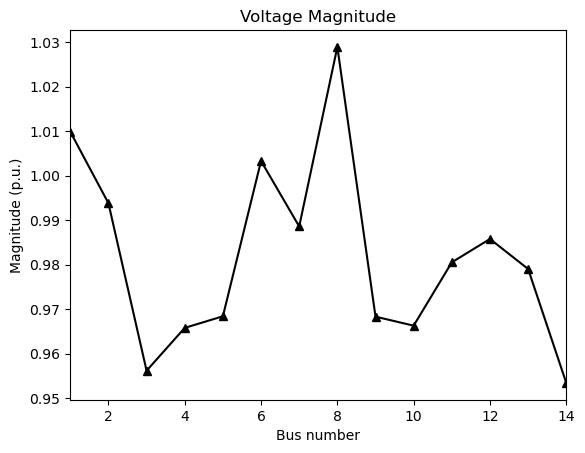

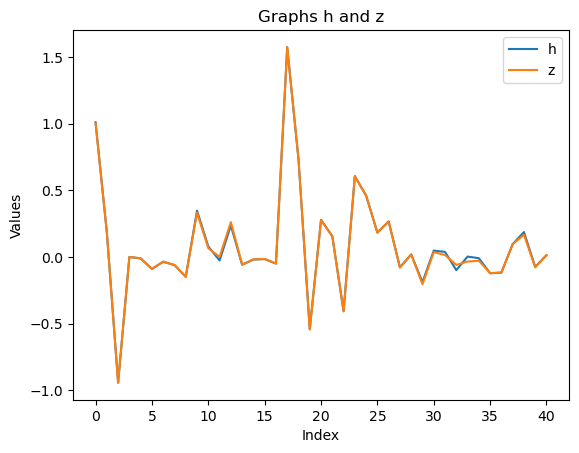

State:

 [[1.00989889]
 [0.99382396]
 [0.95617031]
 [0.9657967 ]
 [0.96840417]
 [1.00332621]
 [0.98859708]
 [1.0289596 ]
 [0.96831933]
 [0.96629891]
 [0.98053778]
 [0.98578277]
 [0.97903393]
 [0.95342353]]
38


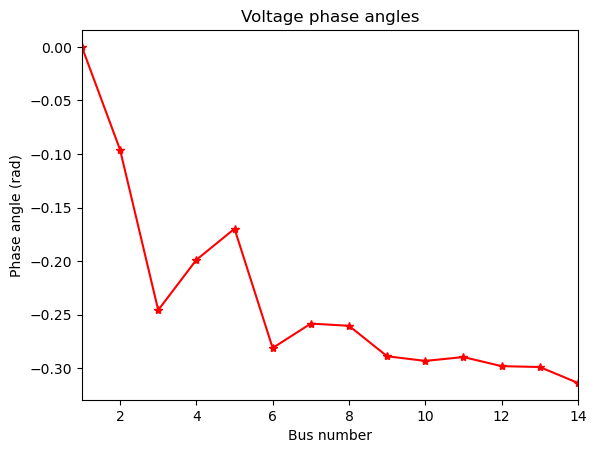

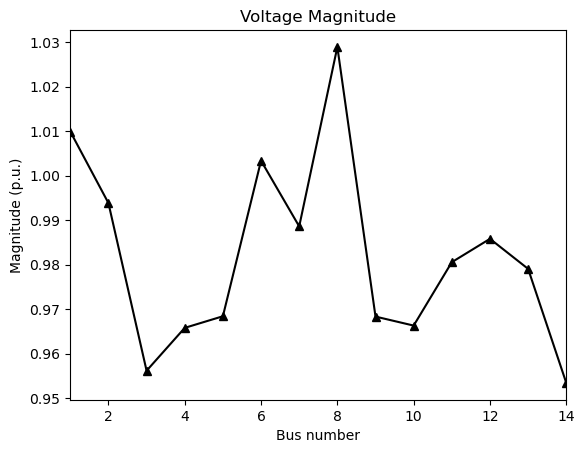

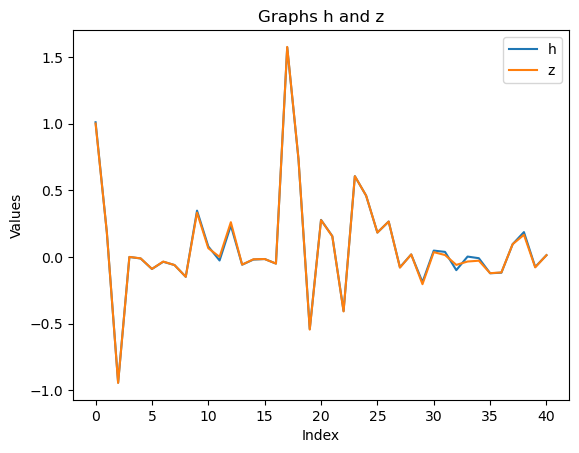

State:

 [[1.00989605]
 [0.99382485]
 [0.9561752 ]
 [0.9658009 ]
 [0.96840739]
 [1.00333898]
 [0.98858458]
 [1.02889091]
 [0.96833255]
 [0.96631213]
 [0.98055097]
 [0.98579528]
 [0.97904631]
 [0.95343595]]
39


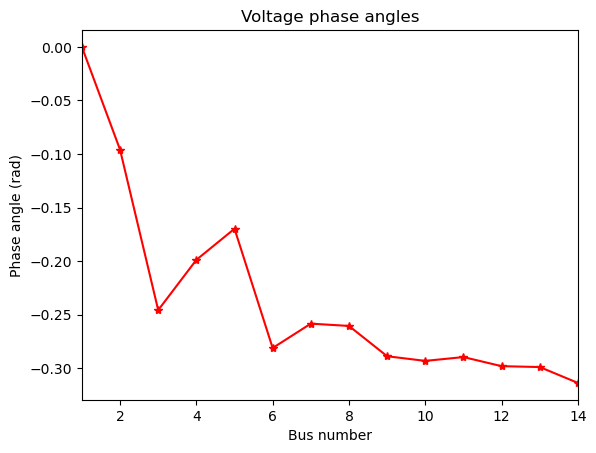

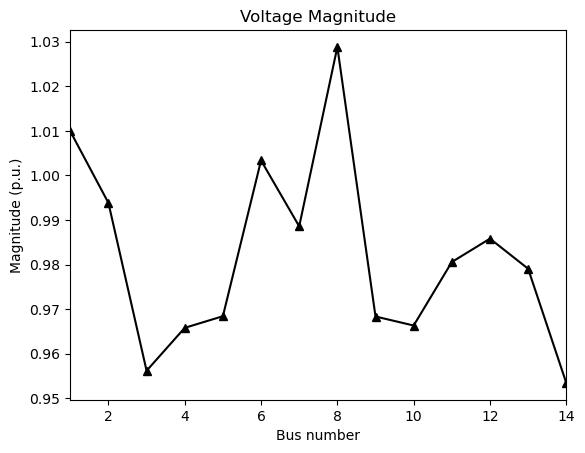

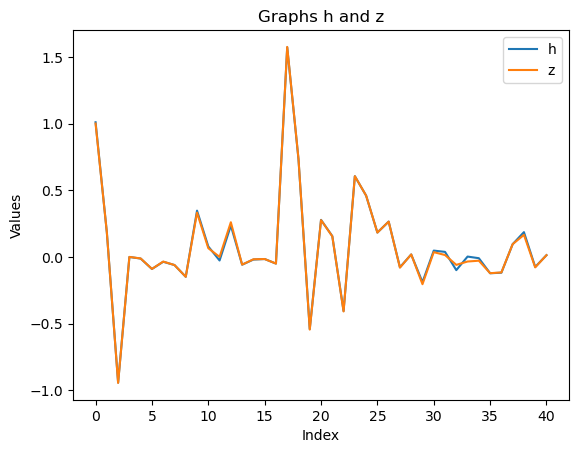

State:

 [[1.00989671]
 [0.99382778]
 [0.95618191]
 [0.96580707]
 [0.96841256]
 [1.00335498]
 [0.98857219]
 [1.02881731]
 [0.96834799]
 [0.96632785]
 [0.98056724]
 [0.98581125]
 [0.97906255]
 [0.95345111]]
40


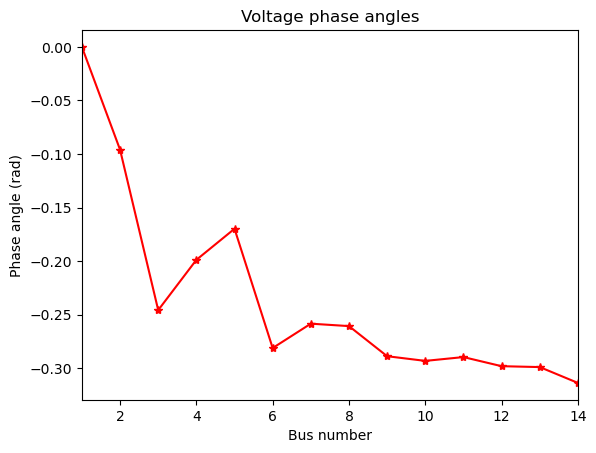

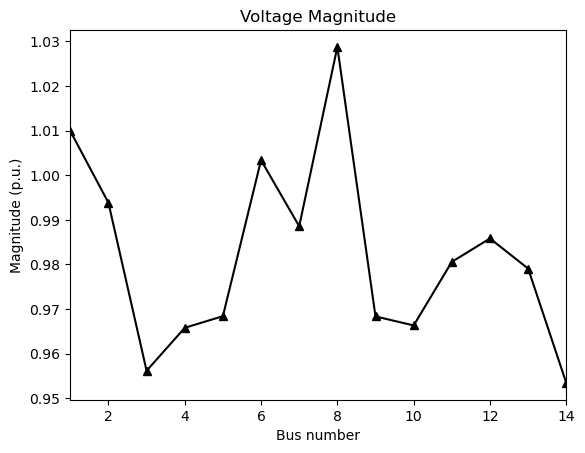

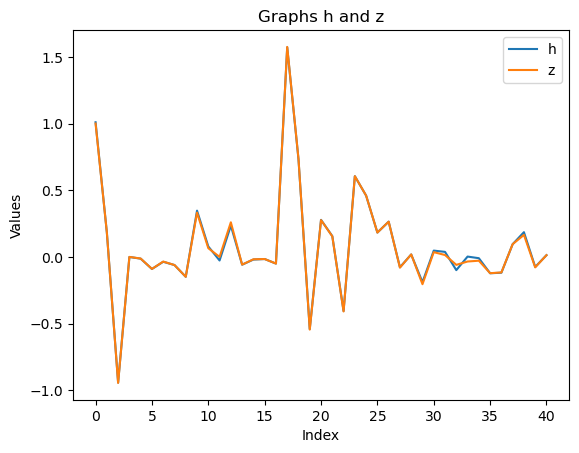

State:

 [[1.00989759]
 [0.99383094]
 [0.95618901]
 [0.96581334]
 [0.96841796]
 [1.00337158]
 [0.98855841]
 [1.0287375 ]
 [0.9683642 ]
 [0.96634425]
 [0.98058403]
 [0.9858277 ]
 [0.97907878]
 [0.9534677 ]]
41


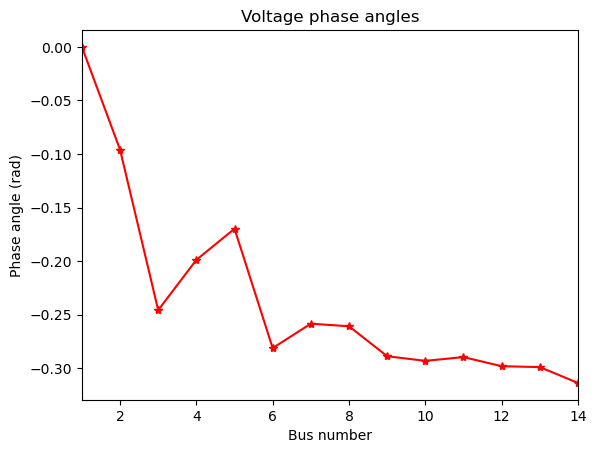

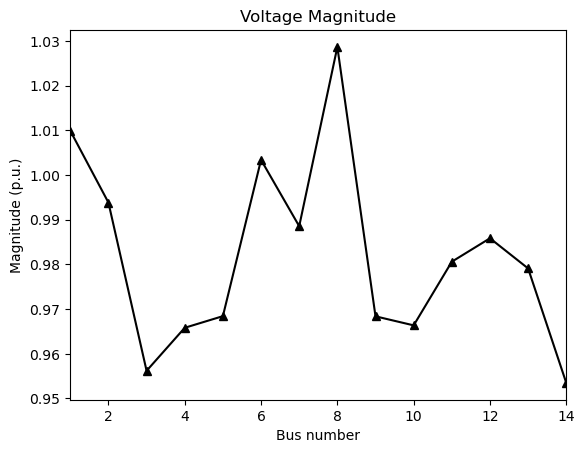

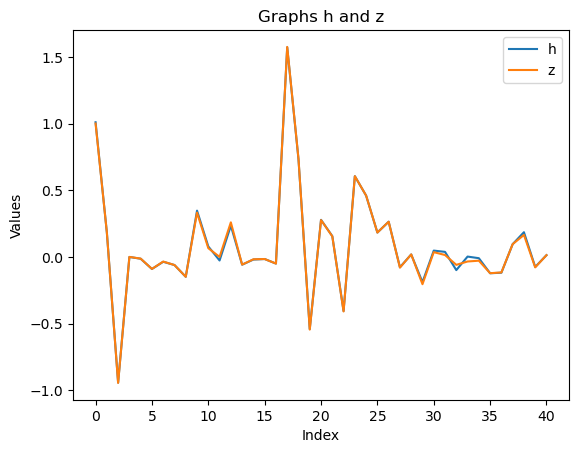

State:

 [[1.0098954 ]
 [0.9938319 ]
 [0.95619369]
 [0.96581766]
 [0.96842132]
 [1.00338666]
 [0.98854192]
 [1.02865152]
 [0.96837976]
 [0.96635977]
 [0.98059955]
 [0.98584256]
 [0.97909361]
 [0.95348256]]
42


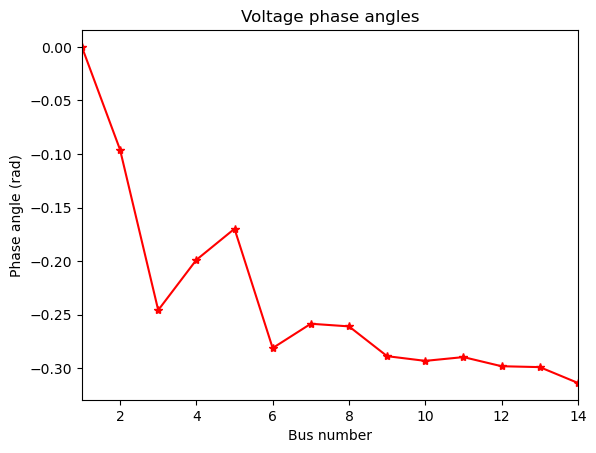

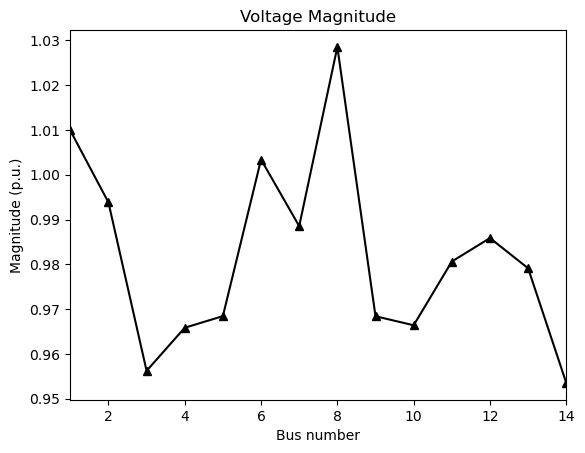

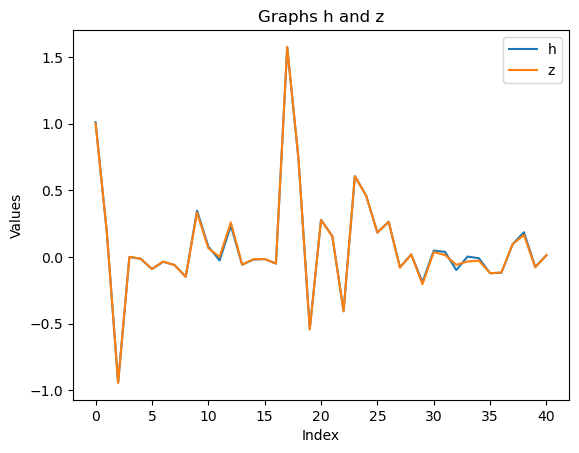

State:

 [[1.00989669]
 [0.99383537]
 [0.95620089]
 [0.9658241 ]
 [0.96842675]
 [1.00340485]
 [0.98852573]
 [1.02856245]
 [0.96839669]
 [0.96637707]
 [0.9806177 ]
 [0.98586044]
 [0.97911138]
 [0.95349928]]
43


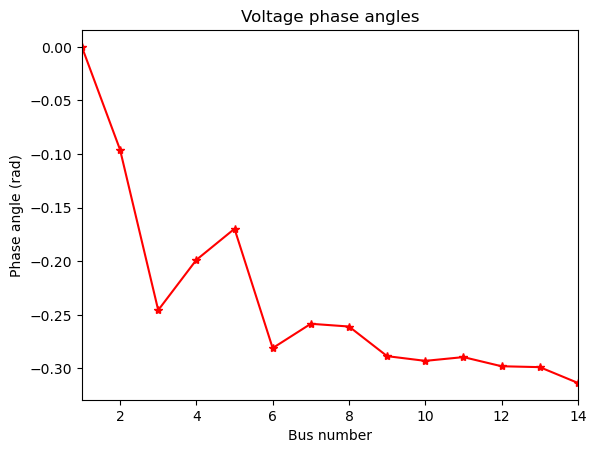

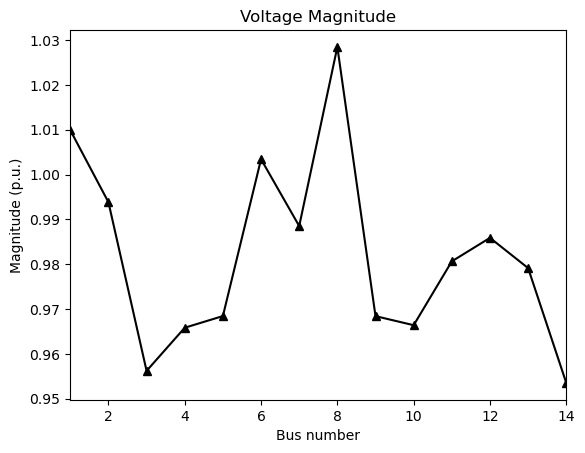

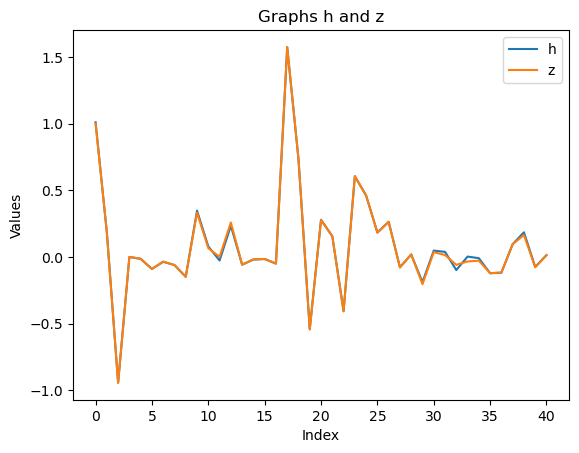

State:

 [[1.00989425]
 [0.99383652]
 [0.9562059 ]
 [0.96582902]
 [0.96843069]
 [1.0034226 ]
 [0.9885072 ]
 [1.028466  ]
 [0.96841427]
 [0.96639475]
 [0.98063567]
 [0.98587806]
 [0.97912883]
 [0.9535172 ]]
44


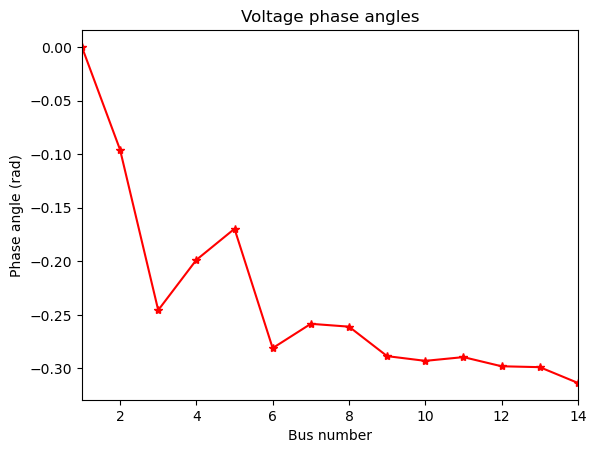

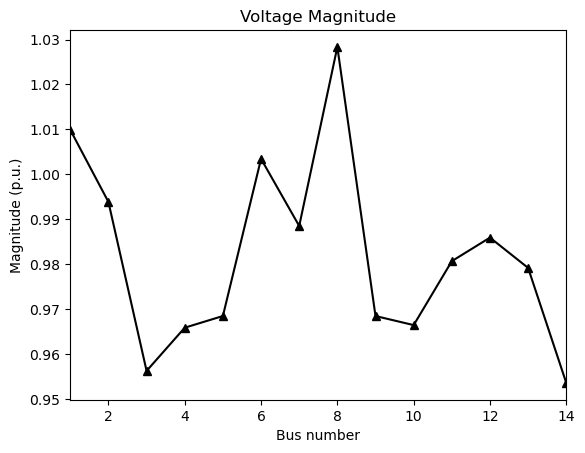

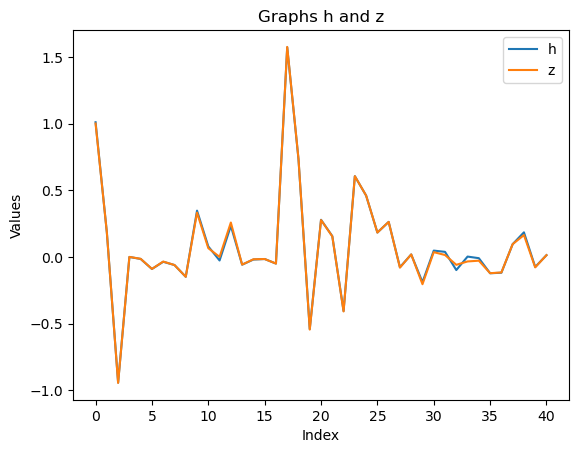

State:

 [[1.0098961 ]
 [0.99384015]
 [0.95621277]
 [0.9658352 ]
 [0.9684363 ]
 [1.00344133]
 [0.98848841]
 [1.02836596]
 [0.96843278]
 [0.96641334]
 [0.98065459]
 [0.98589687]
 [0.97914793]
 [0.95353544]]
45


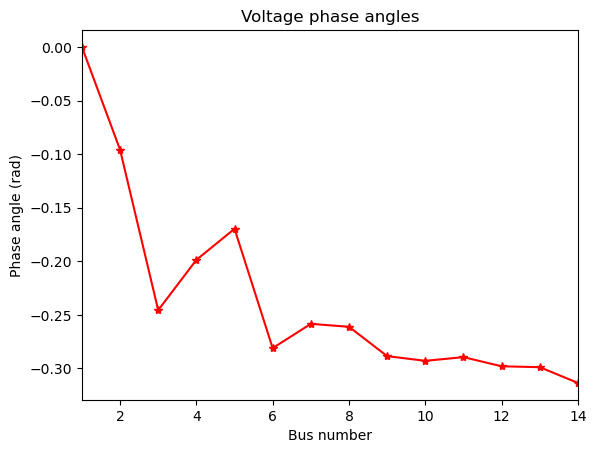

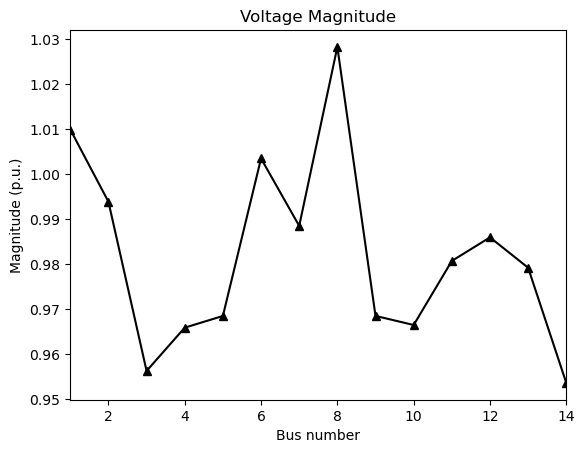

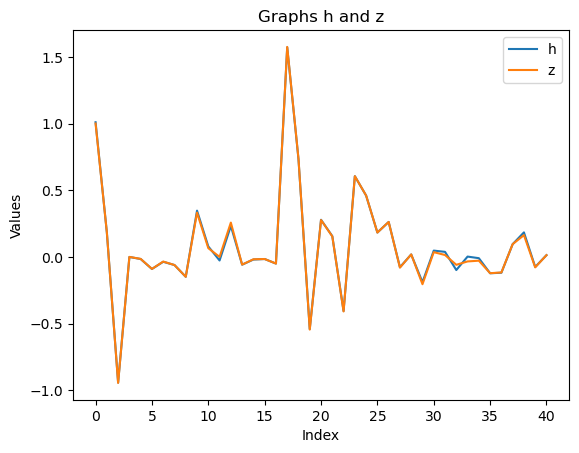

State:

 [[1.00989794]
 [0.99384374]
 [0.9562197 ]
 [0.96584165]
 [0.96844176]
 [1.0034602 ]
 [0.98846876]
 [1.02826148]
 [0.96845233]
 [0.96643275]
 [0.98067396]
 [0.9859155 ]
 [0.9791665 ]
 [0.95355419]]
46


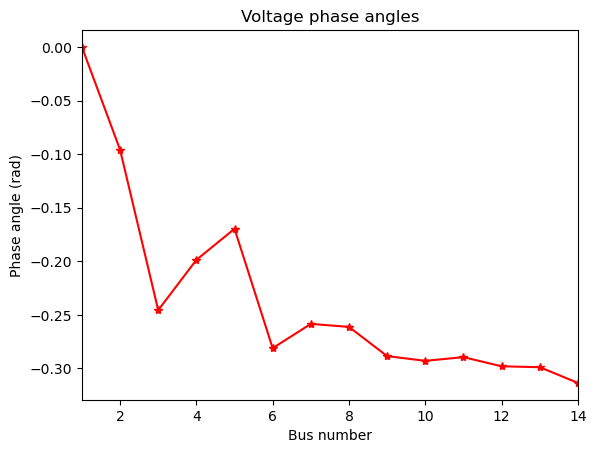

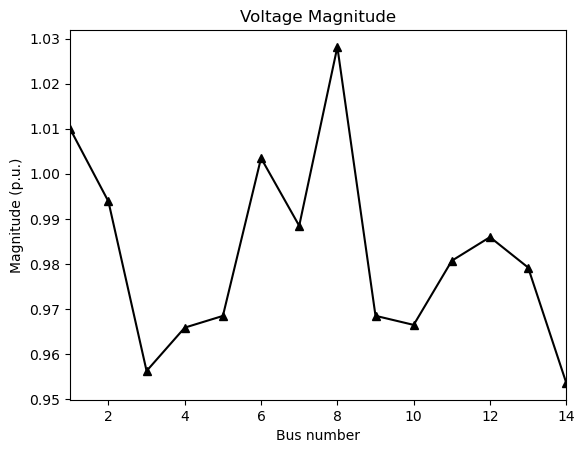

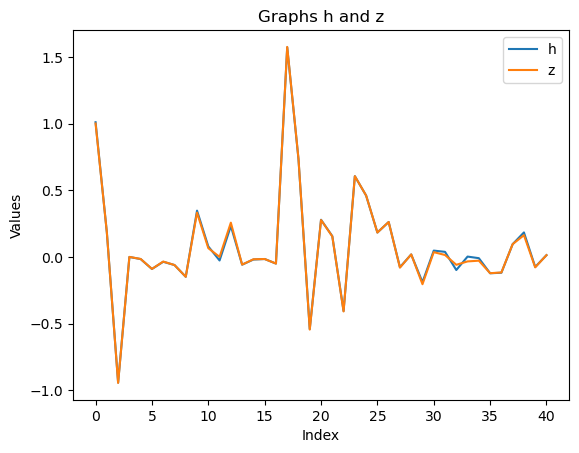

State:

 [[1.00989576]
 [0.99384452]
 [0.9562242 ]
 [0.96584606]
 [0.96844518]
 [1.0034792 ]
 [0.98844614]
 [1.02815103]
 [0.96847019]
 [0.96645092]
 [0.98069295]
 [0.98593439]
 [0.97918519]
 [0.9535727 ]]
47


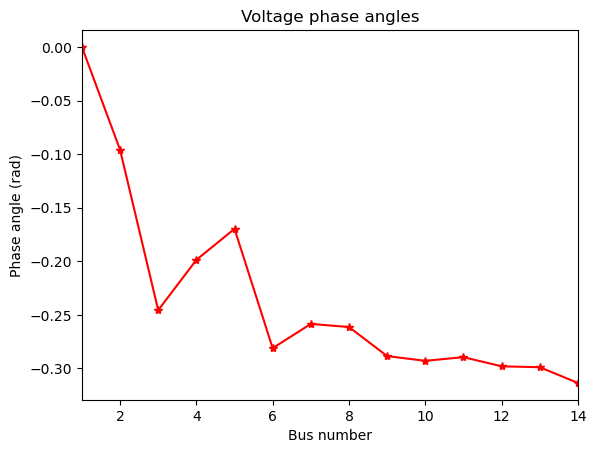

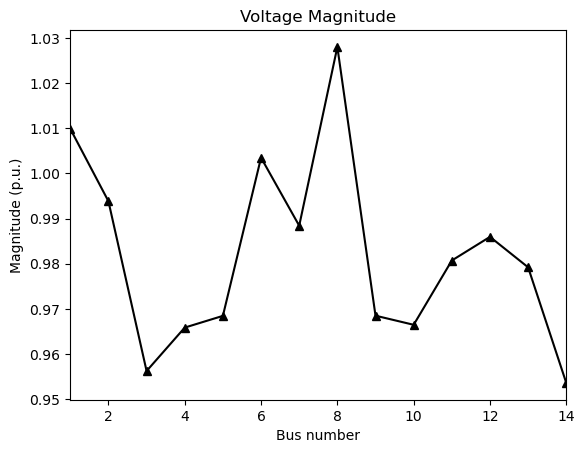

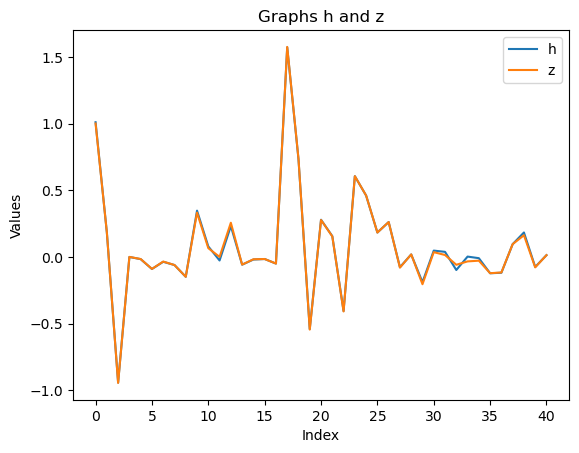

State:

 [[1.00989708]
 [0.99384755]
 [0.95623045]
 [0.96585161]
 [0.96845016]
 [1.00349936]
 [0.9884235 ]
 [1.02803688]
 [0.96848992]
 [0.9664707 ]
 [0.98071317]
 [0.98595464]
 [0.97920574]
 [0.95359242]]
48


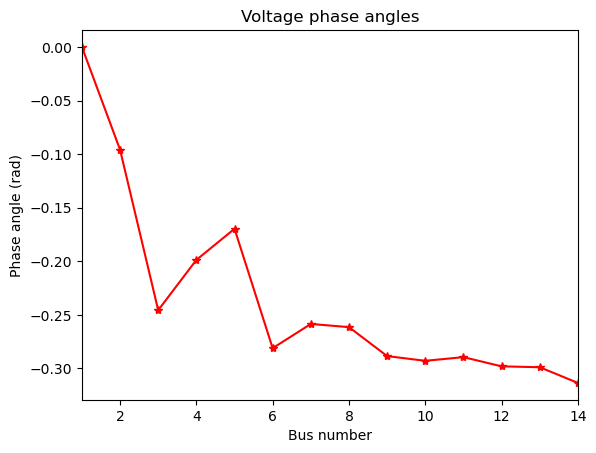

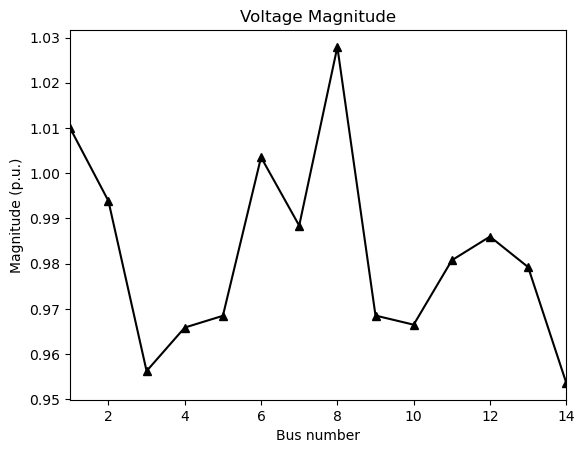

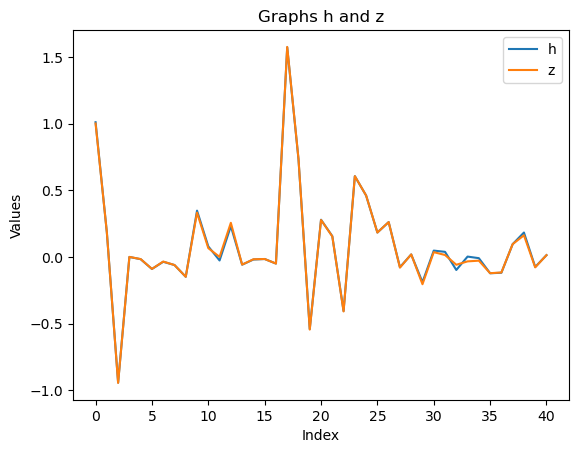

State:

 [[1.00989478]
 [0.99384822]
 [0.95623447]
 [0.96585608]
 [0.96845407]
 [1.00351899]
 [0.9883989 ]
 [1.02791729]
 [0.96850971]
 [0.96649046]
 [0.98073314]
 [0.98597413]
 [0.97922511]
 [0.95361233]]
49


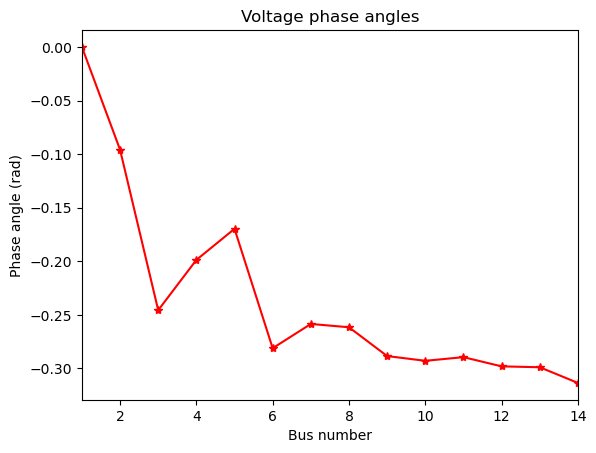

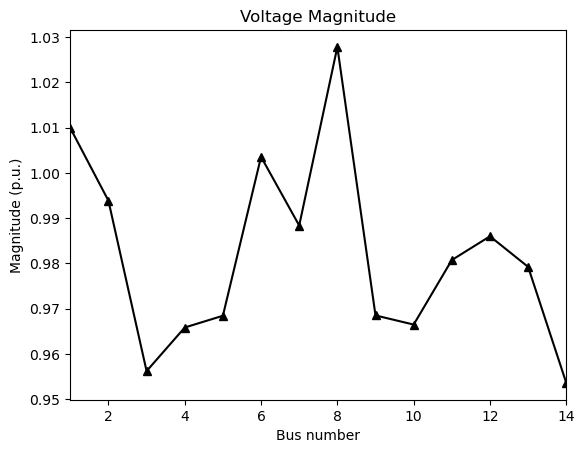

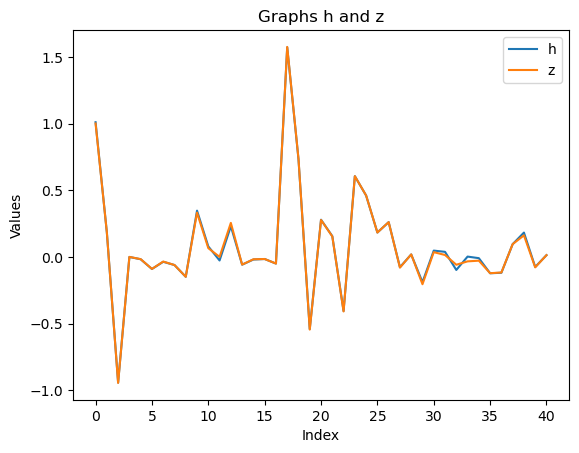

State:

 [[1.00989719]
 [0.99385183]
 [0.9562409 ]
 [0.96586191]
 [0.9684589 ]
 [1.00354099]
 [0.98837409]
 [1.02779465]
 [0.96852976]
 [0.96651081]
 [0.98075465]
 [0.98599604]
 [0.97924683]
 [0.95363278]]


 Final State:

 [[1.00989719]
 [0.99385183]
 [0.9562409 ]
 [0.96586191]
 [0.9684589 ]
 [1.00354099]
 [0.98837409]
 [1.02779465]
 [0.96852976]
 [0.96651081]
 [0.98075465]
 [0.98599604]
 [0.97924683]
 [0.95363278]]


In [8]:
Pi= pd.read_csv("Zdata_small.csv")
nbus=14;
Pi= Pi.to_numpy();
Pi=Pi;
num=14


# The main code for state estimation using EKF

V = np.ones((nbus,1)) # Initialize the bus voltages..
del1 = np.zeros((nbus,1)); # Initialize the bus angles..


ekf = ExtendedKalmanFilter(dim_x=27, dim_z=41)


initial_state = np.zeros((27, 1))  # Initial state vector
for i in range(13,27):
    initial_state[i]=1
initial_covariance = np.eye(27)*1 # Initial covariance matrix

ekf.x = initial_state
ekf.P = initial_covariance # Initial covariance matrix

ekf.Q =np.eye(27)# Process noise covariance matrix
ekf.R = np.eye(41) # Measurement noise covariance matrix
def f(x, dt):
    F = np.identity(27)
    return F @ x


for i in range (0,50):
    print(i)
    zdata = zdatas(i)
    z = zdata[:,2]
    
    
    ekf.HJacobian=HJacobian_at1
    ekf.h=Hx
    num_buses=14;
    ekf.F =np.identity(27);
    ekf.f=f
    
    ekf.predict()  # Prediction step using system dynamics function
    ekf.update(z,ekf.HJacobian,ekf.h)  # Update step using measurement function
    del1[1:] = ekf.x[0:nbus-1]
    V=ekf.x[nbus-1:]
    h1=Hx(ekf.x)
    r=z-h1



     # ++++++++++++++++++++++
    # Presenting the results
    # ===================


    plot.figure()
    plot.plot(range(1,nbus+1),del1,'-r*')
    plot.title('Voltage phase angles')
    plot.xlabel('Bus number')
    plot.ylabel('Phase angle (rad)')
    plot.xlim(1,nbus)

    plot.figure()
    plot.plot(range(1,nbus+1),V,'-k^')
    plot.title('Voltage Magnitude')
    plot.xlabel('Bus number')
    plot.ylabel('Magnitude (p.u.)')
    plot.xlim(1,nbus)
    plot.show()

    fig, ax = plot.subplots()
    ax.plot(h1, label='h')
    ax.plot(z, label='z')
    ax.set_title('Graphs h and z')             # Set the plot title and labels
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()                                # Add a legend
    plot.show()                                # Display the plot

    print("State:\n\n", ekf.x[13:])
    
    
print("\n\n Final State:\n\n", ekf.x[13:])




